In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Problem 1 : Data Preparation

a) Import the “train.csv” data you downloaded (either from NTU Learn or Kaggle) in Jupyter Notebook.

b) What are the data types (“dtypes”) – int64/float64/object – of the variables (columns) in the dataset?

c) Create a new Pandas DataFrame consisting of only the variables (columns) of type Integer (int64).

d) Open the “data_description.txt” file you downloaded (either from NTU Learn or Kaggle) in Wordpad.
Read the description for each variable carefully and try to identify the “actual” Numeric variables.
Categorical variables are often “encoded” as Numeric variables for easy representation. Spot them.

e) Drop non-Numeric variables from the DataFrame to have a clean DataFrame with Numeric variables.



In [3]:
train_data = pd.read_csv('train.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
SP = pd.DataFrame(train_data['SalePrice'])
SP.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


Numeric variables:

 LotFrontage,
 LotArea,
    YearBuilt,
    YearRemodAdd,
    MasVnrArea,
    BsmtFinSF1,
    BsmtFinSF2,
    BsmtUnfSF,
    TotalBsmtSF,
    1stFlrSF,
    2ndFlrSF,
    LowQualFinSF,
    GrLivArea,
    BsmtFullBath,
    BsmtHalfBath,
    FullBath,
    HalfBath,
    Bedroom,
    Kitchen,
    TotRmsAbvGrd,
    Fireplaces,
    GarageYrBlt,
    GarageCars,
    GarageArea,
    WoodDeckSF,
    OpenPorchSF,
    EnclosedPorch,
    3SsnPorch,
    ScreenPorch,
    PoolArea,
    MiscVal,
    MoSold,
    YrSold,


In [13]:
NN = []
for col in train_data:
    if (train_data[col].dtypes != "int64") and (train_data[col].dtypes != "float64"):
        NN.append(col)
#print(NN)
clean_data = train_data.drop(columns = NN)
clean_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


# Problem 2 : Statistical Summary

Now that you have a “clean” DataFrame with only Numeric variables, we can safely perform standard statistics.

a) Find the Summary Statistics (Mean, Median, Quartiles etc.) of SalePrice from the Numeric DataFrame.

b) Visualize the summary statistics and distribution of SalePrice using standard Box-Plot, Histogram, KDE.

c) Find the Summary Statistics (Mean, Median, Quartiles etc) of LotArea from the Numeric DataFrame.

d) Visualize the summary statistics and distribution of LotArea using standard Box-Plot, Histogram, KDE.

e) Plot SalePrice (y-axis) vs LotArea (x-axis) using jointplot and find the Correlation between the two.

In [14]:
SP.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


<AxesSubplot:>

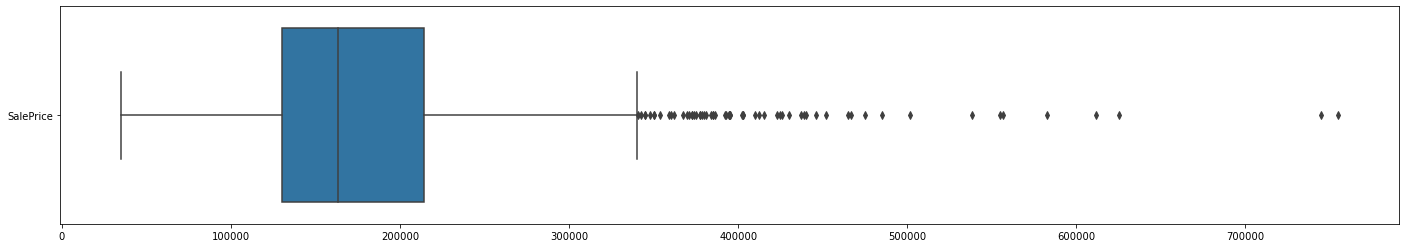

In [31]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = SP, orient = "h")

<AxesSubplot:ylabel='Count'>

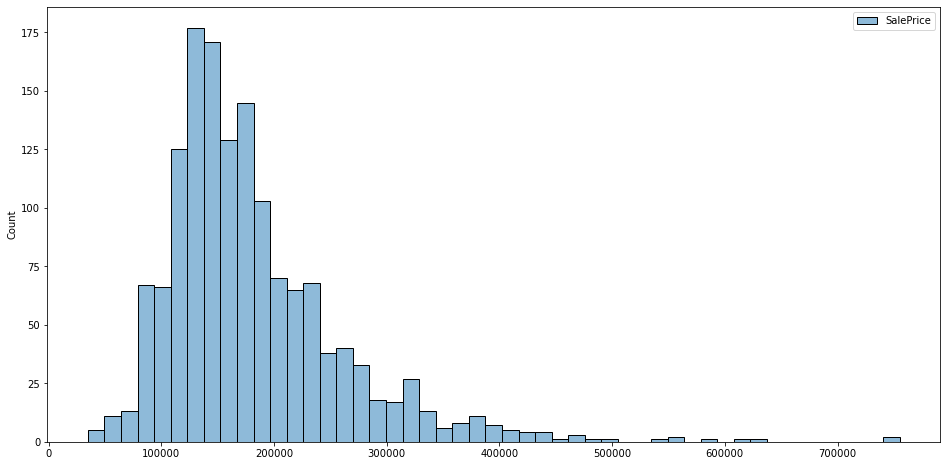

In [32]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = SP)

<AxesSubplot:ylabel='Density'>

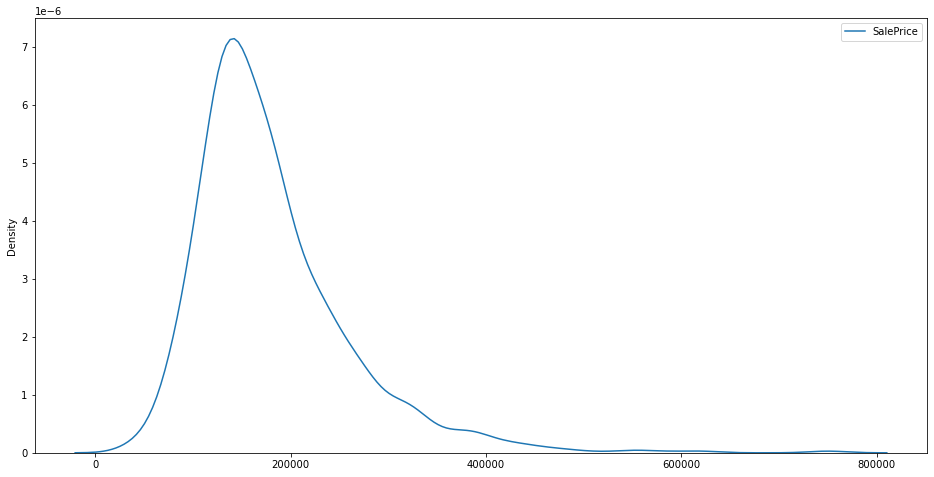

In [33]:
f = plt.figure(figsize=(16, 8))
sb.kdeplot(data = SP)

In [35]:
LA = pd.DataFrame(train_data['LotArea'])
LA.head()

,LotArea
0,8450
1,9600
2,11250
3,9550
4,14260


In [36]:
LA.describe()

,LotArea
count,1460.000000
mean,10516.828082
std,9981.264932
min,1300.000000
25%,7553.500000
50%,9478.500000
75%,11601.500000
max,215245.000000


<AxesSubplot:>

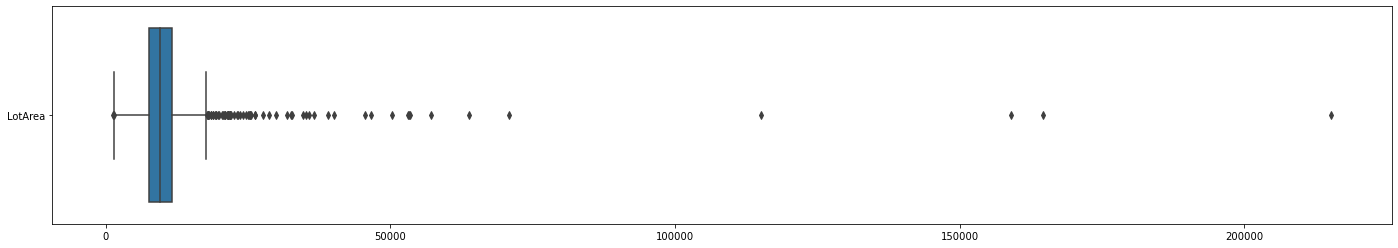

In [46]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = LA, orient = "h")

<AxesSubplot:ylabel='Count'>

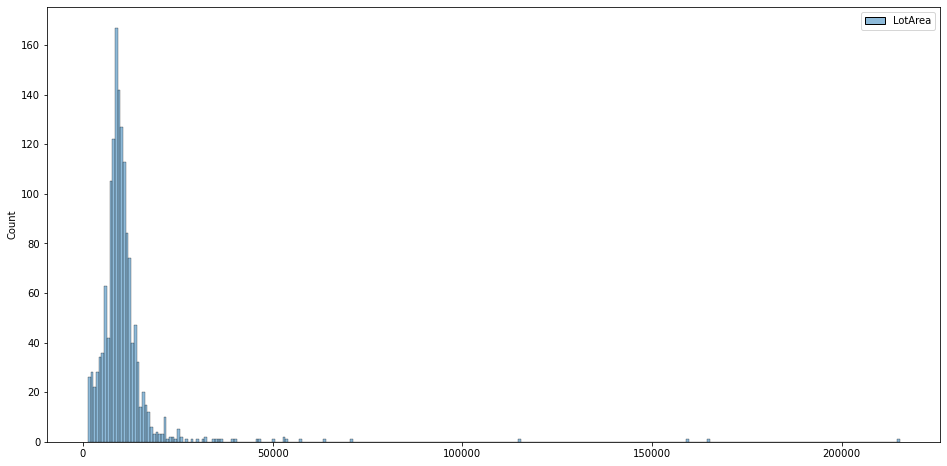

In [45]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = LA)

<AxesSubplot:ylabel='Density'>

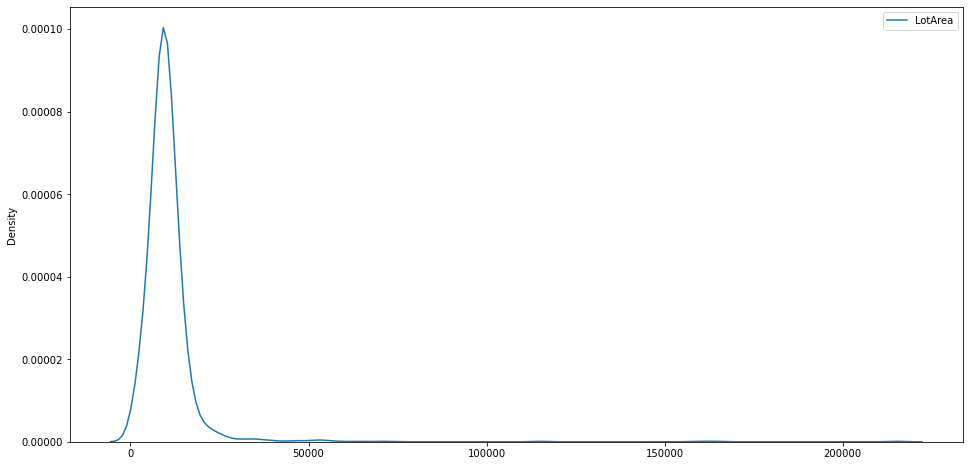

In [47]:
f = plt.figure(figsize=(16, 8))
sb.kdeplot(data = LA)

In [54]:
jointDF = pd.concat([LA, SP], axis=1).reindex(LA.index)
jointDF

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000
...,...,...
1455,7917,175000
1456,13175,210000
1457,9042,266500
1458,9717,142125


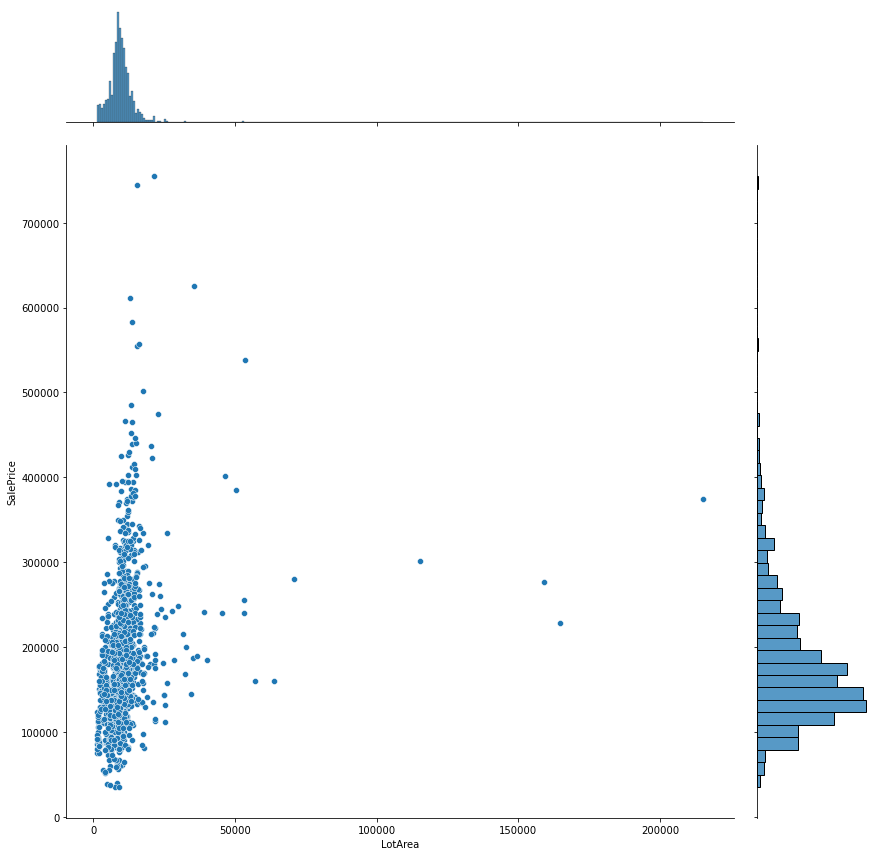

In [55]:
sb.jointplot(data = jointDF, x = "LotArea", y = "SalePrice", height = 12)

In [56]:
jointDF.corr()

,LotArea,SalePrice
LotArea,1.000000,0.263843
SalePrice,0.263843,1.000000


# Bonus

Create a new Pandas DataFrame consisting of all variables (columns) of type Integer (int64) or Float (float64).

Read the description for each variable carefully and try to identify the “actual” Numeric variables in the data.


Drop non-Numeric variables from the DataFrame to have a clean DataFrame with only the Numeric variables.

Plot SalePrice vs each of the Numeric variables you identified to understand their correlation or dependence.


Numeric variables:

LotFrontage, LotArea, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, Bedroom, Kitchen, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold

In [69]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [78]:
Numeric = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
           'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
           'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 
           'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch','3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 
           'YrSold']
Non_Numeric = []
for col in clean_data:
    if (col not in Numeric) and (col != 'SalePrice'):
        Non_Numeric.append(str(col))
        
print(Non_Numeric)

clean_data.drop(columns = Non_Numeric, inplace=True)    #why must put inplace
        
clean_data.info()

[]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   YearBuilt      1460 non-null   int64  
 3   YearRemodAdd   1460 non-null   int64  
 4   MasVnrArea     1452 non-null   float64
 5   BsmtFinSF1     1460 non-null   int64  
 6   BsmtFinSF2     1460 non-null   int64  
 7   BsmtUnfSF      1460 non-null   int64  
 8   TotalBsmtSF    1460 non-null   int64  
 9   1stFlrSF       1460 non-null   int64  
 10  2ndFlrSF       1460 non-null   int64  
 11  LowQualFinSF   1460 non-null   int64  
 12  GrLivArea      1460 non-null   int64  
 13  BsmtFullBath   1460 non-null   int64  
 14  BsmtHalfBath   1460 non-null   int64  
 15  FullBath       1460 non-null   int64  
 16  HalfBath       1460 non-null   int64  
 17  BedroomAbvGr   1460 non-null   int64  
 18  Kitch

C:\Users\Agnes Tan\anaconda3\lib\site-packages\seaborn\axisgrid.py:1670: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


ValueError: If using all scalar values, you must pass an index

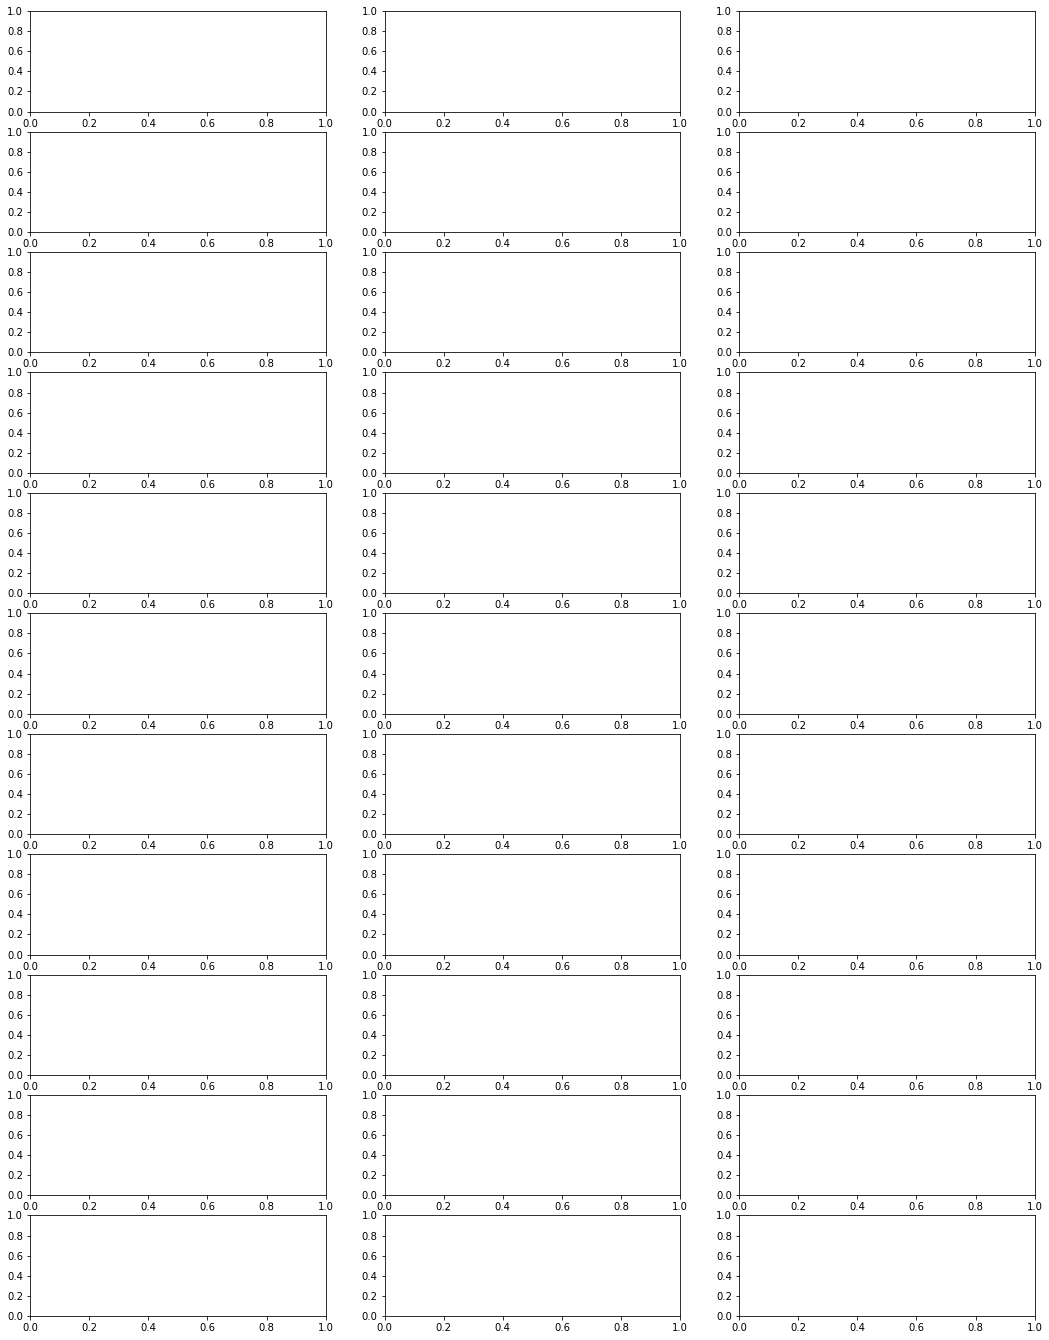

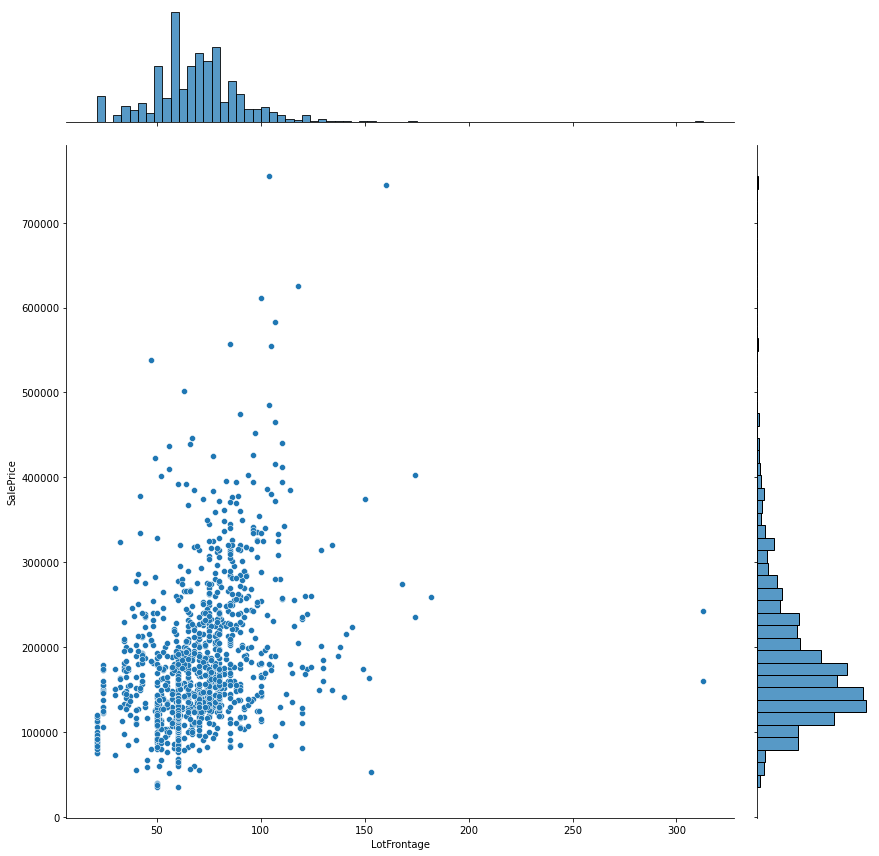

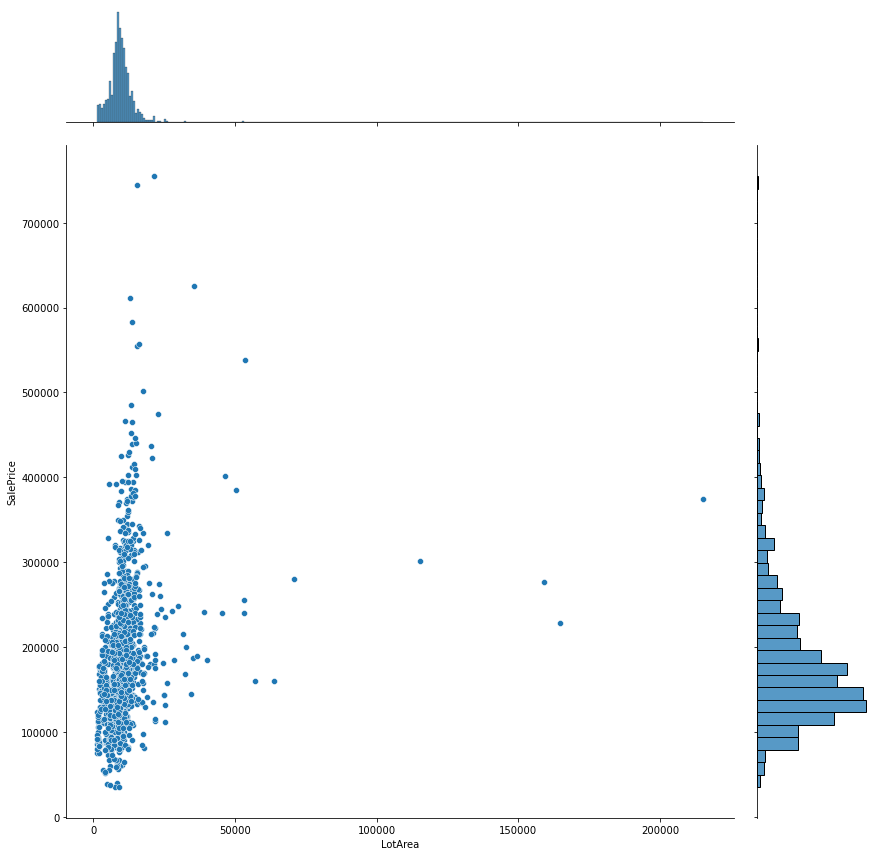

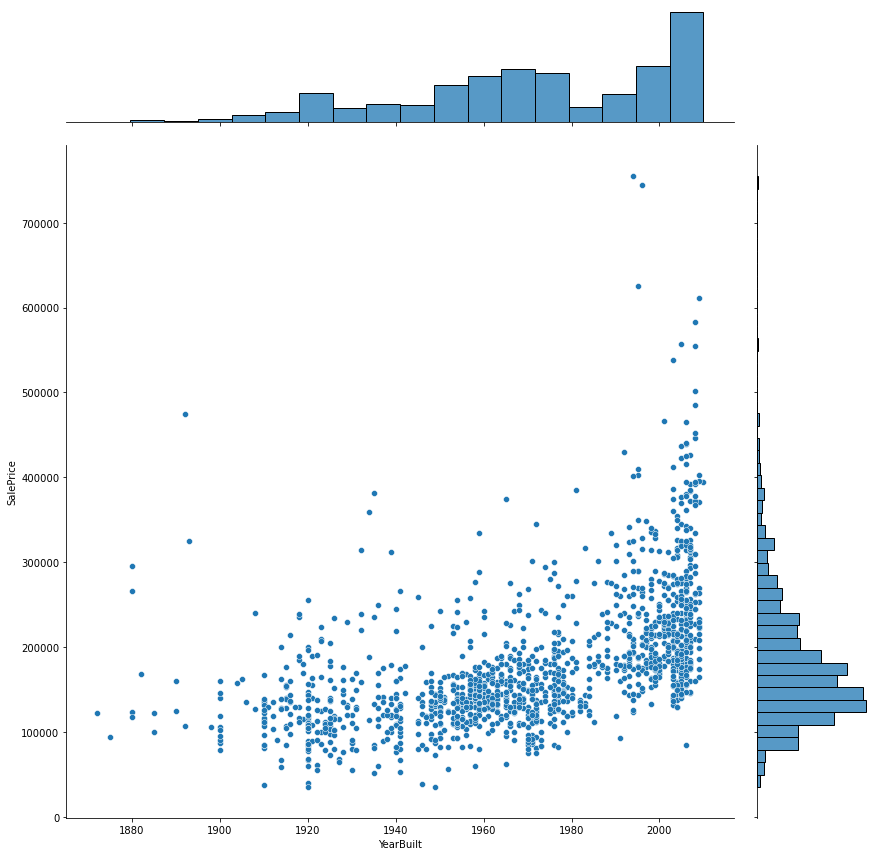

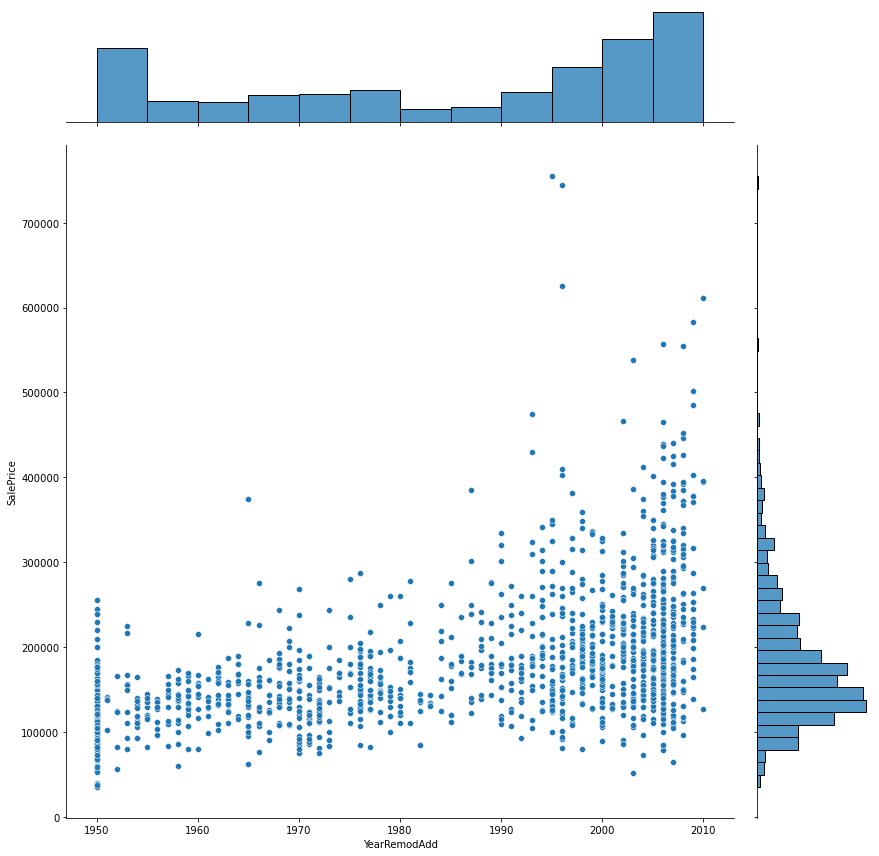

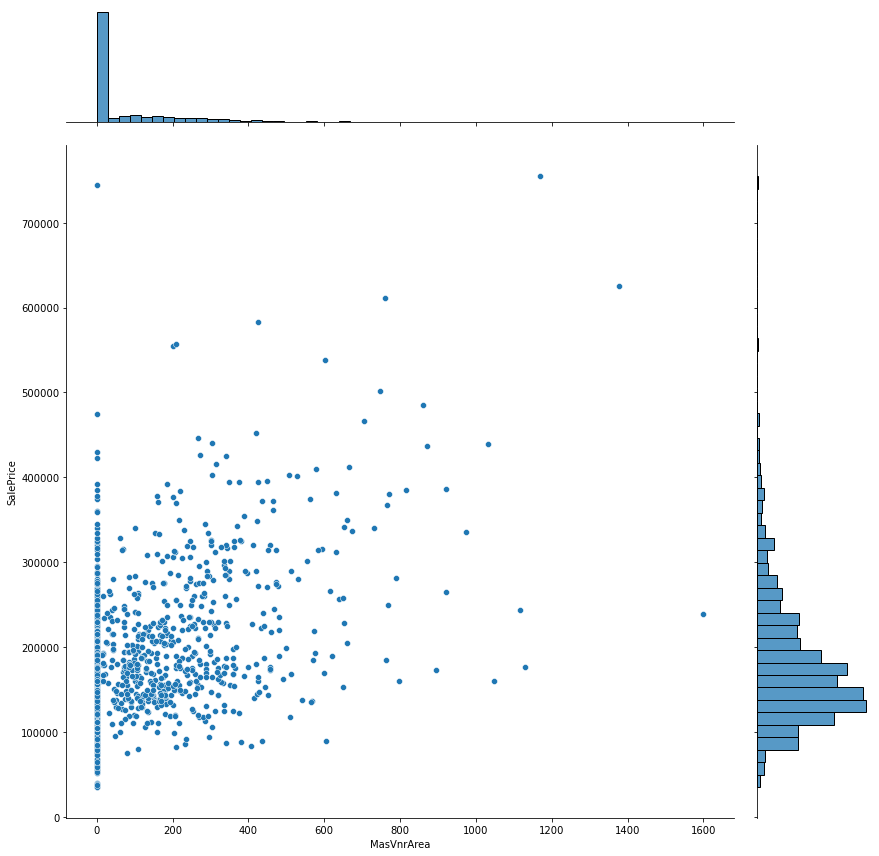

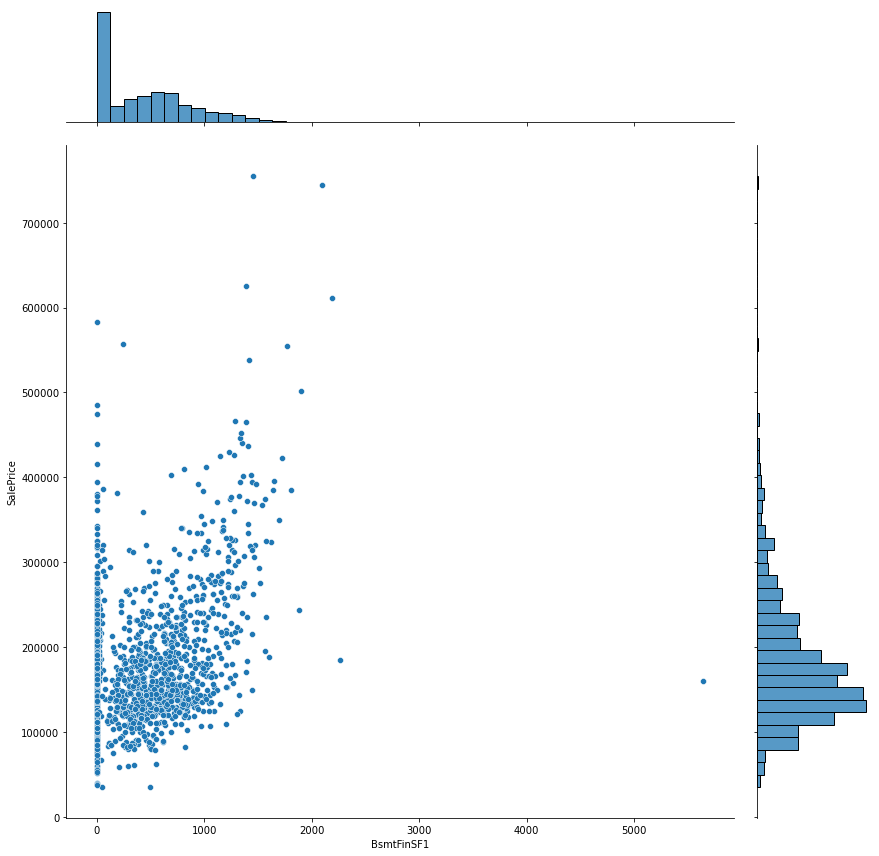

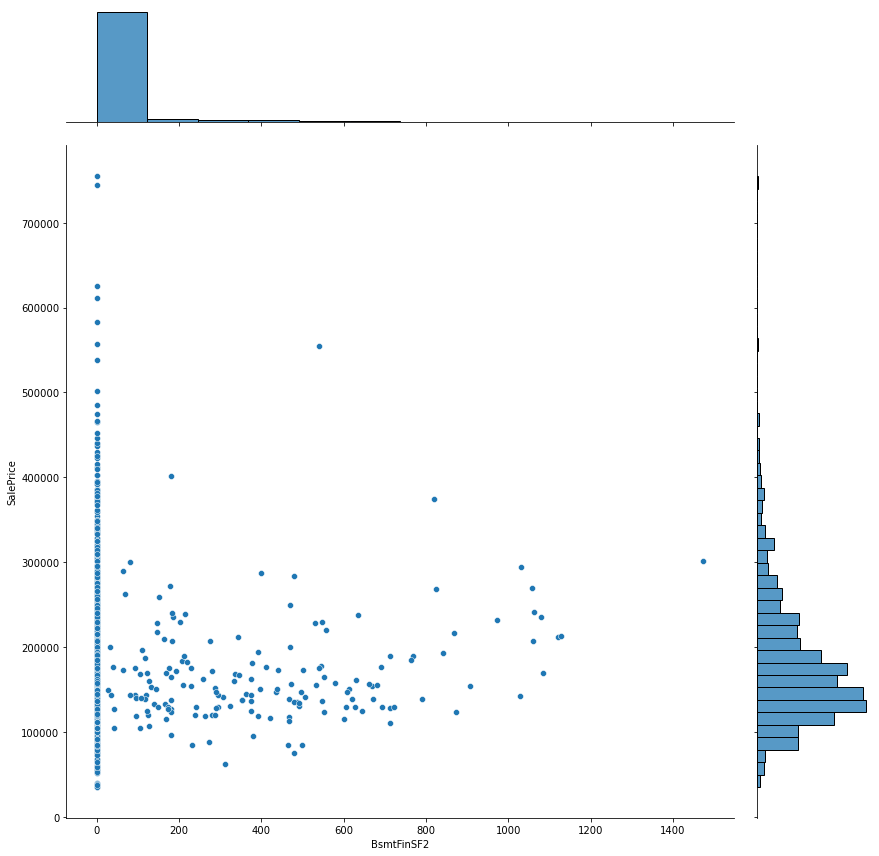

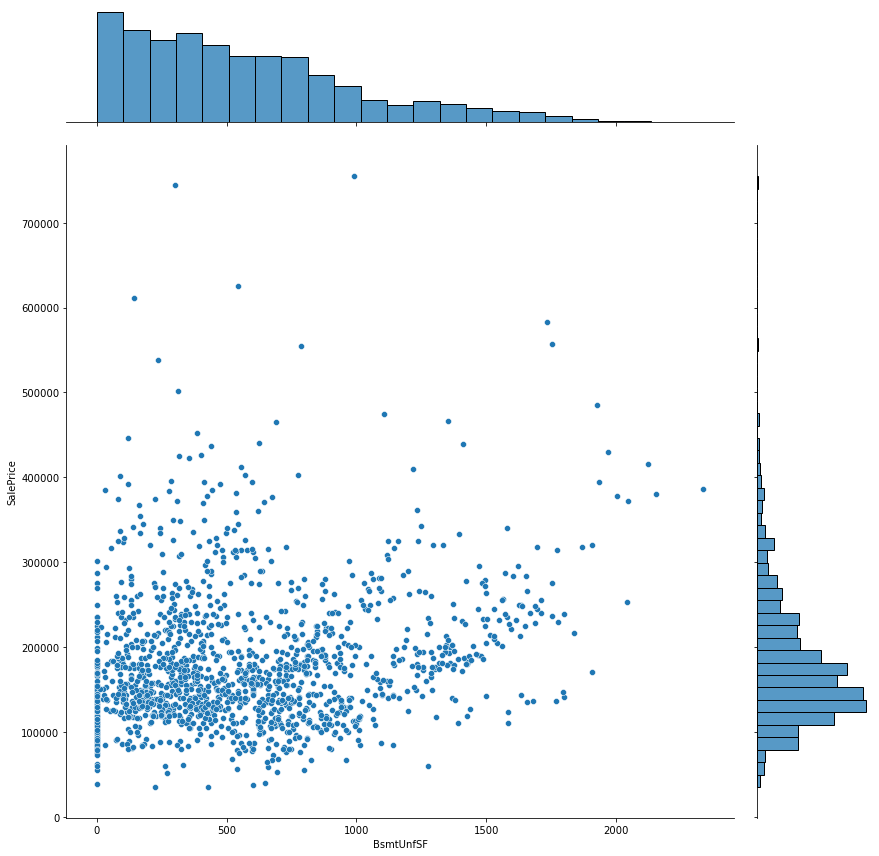

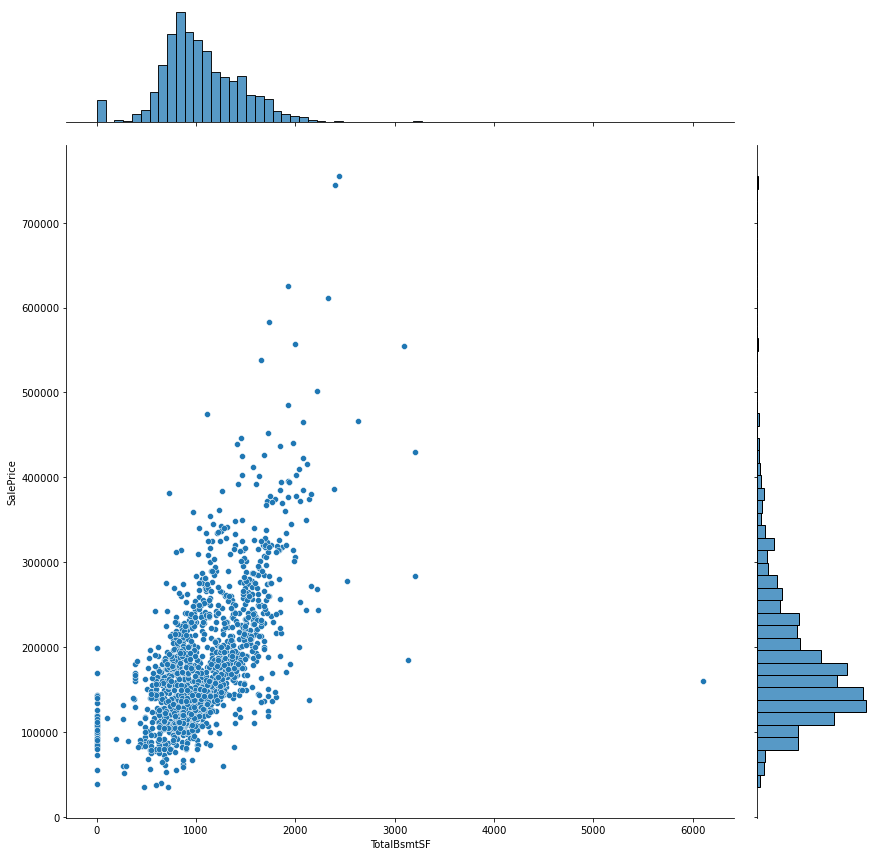

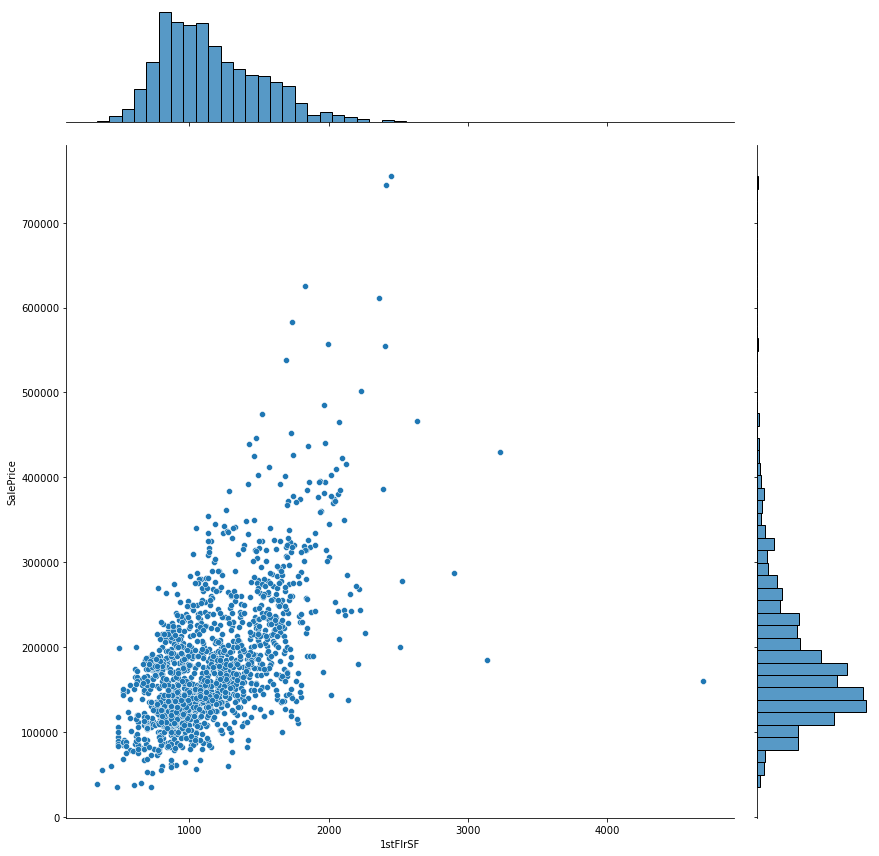

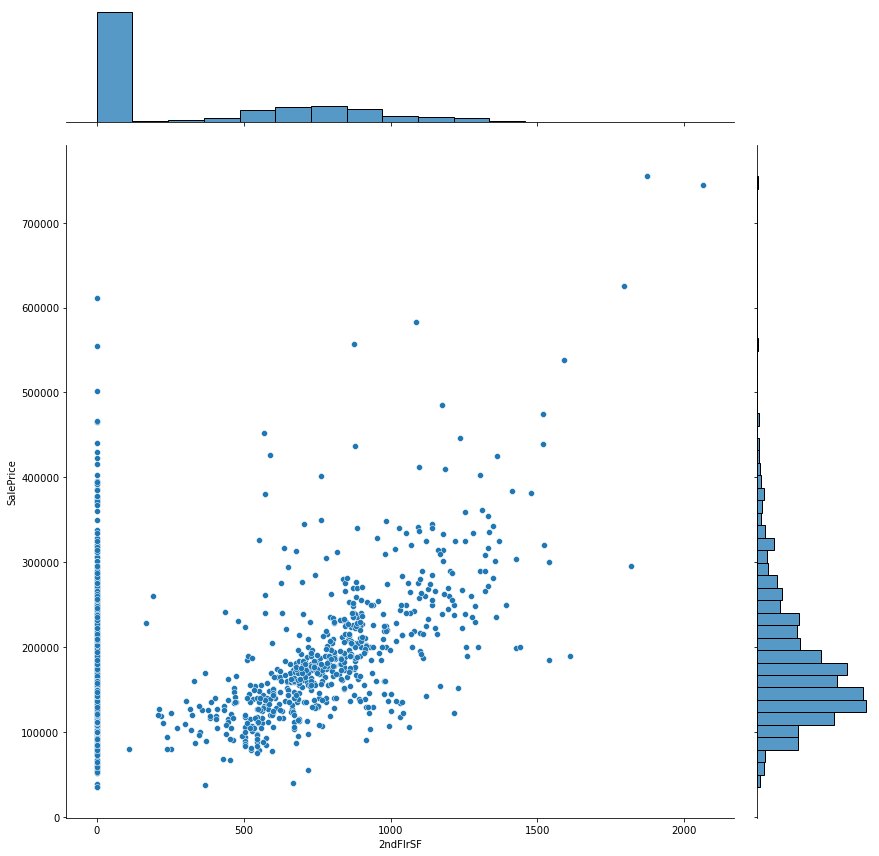

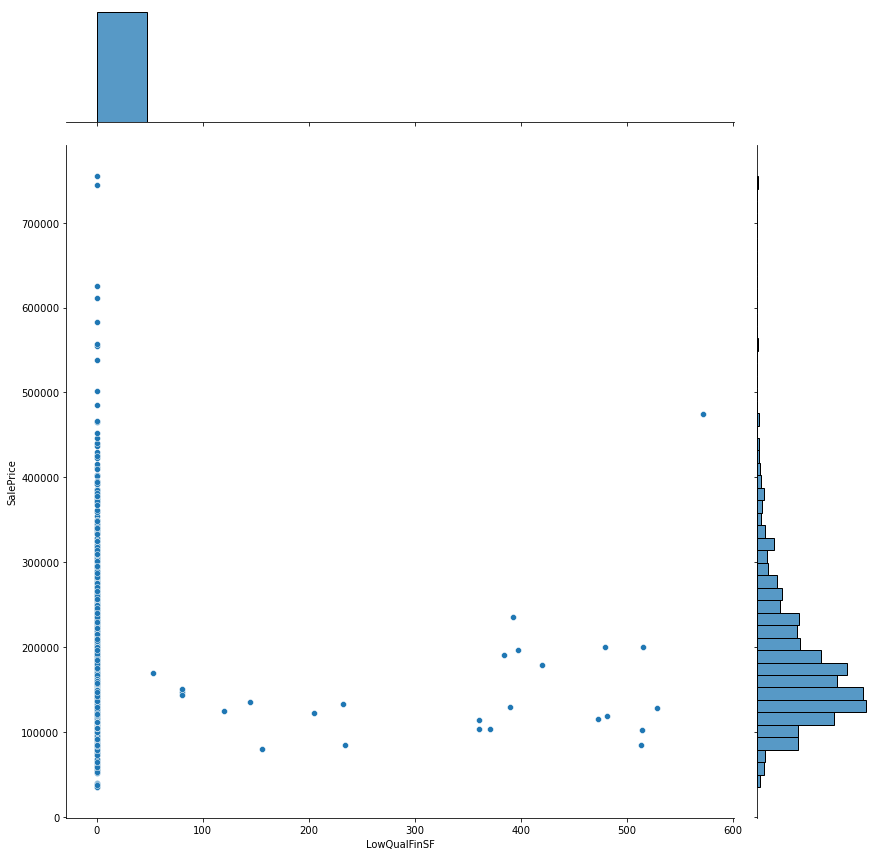

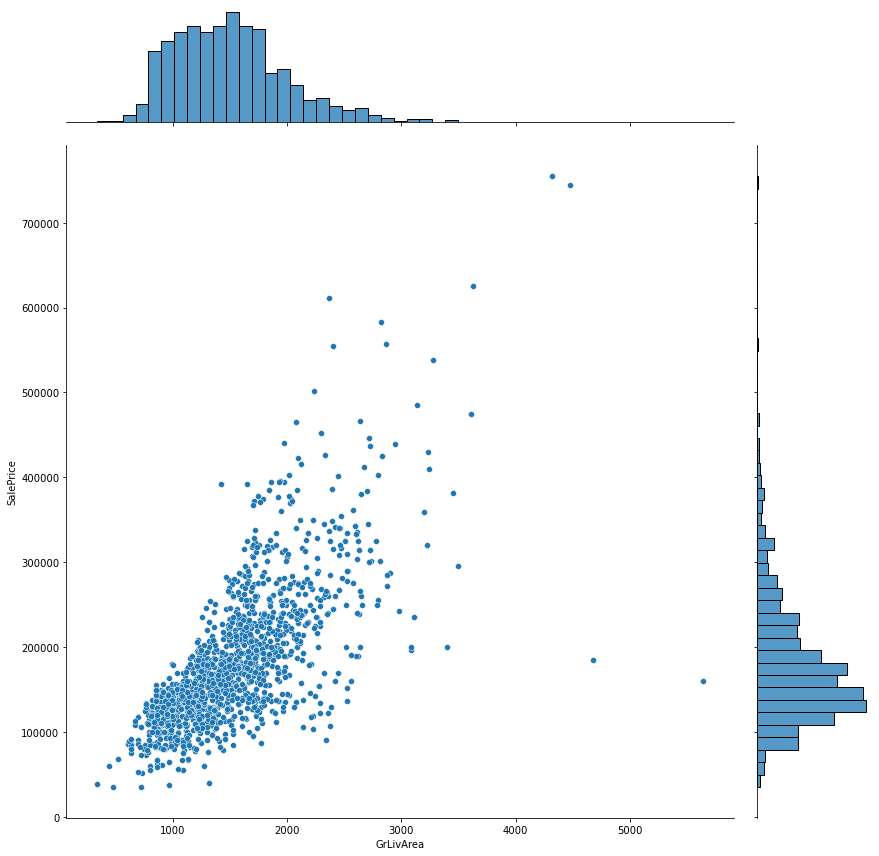

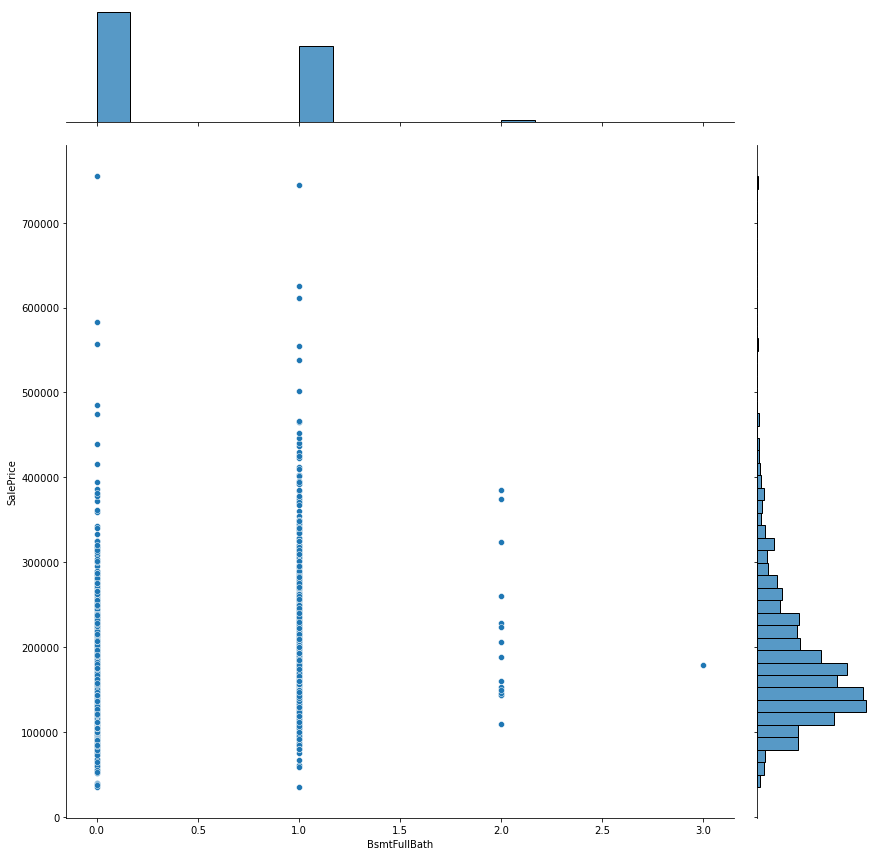

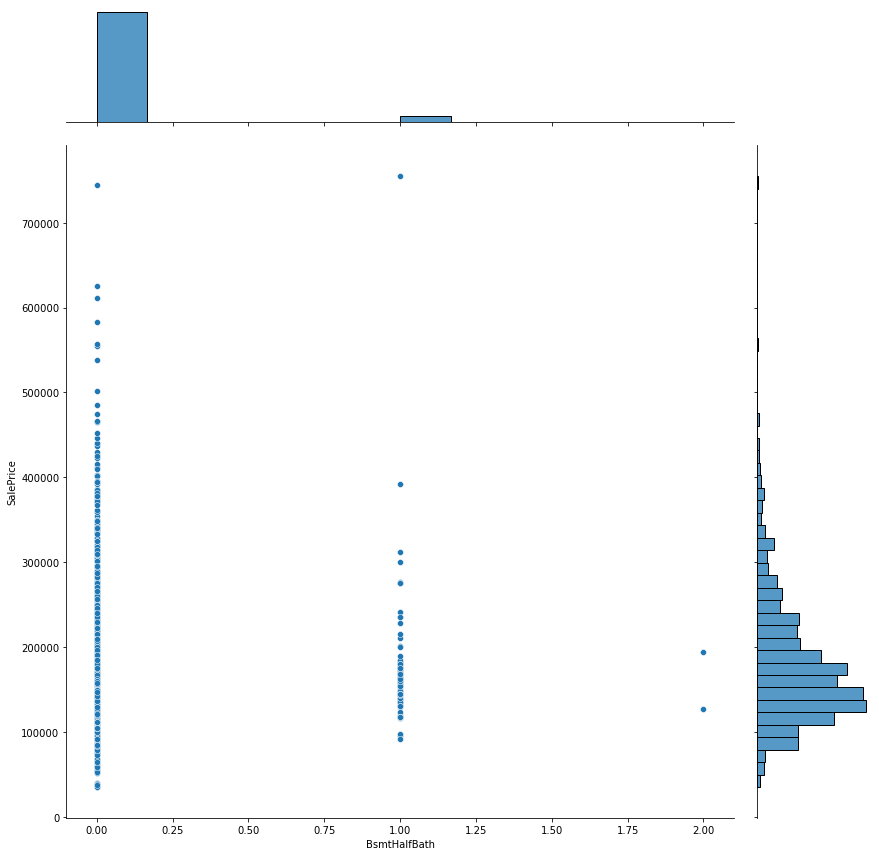

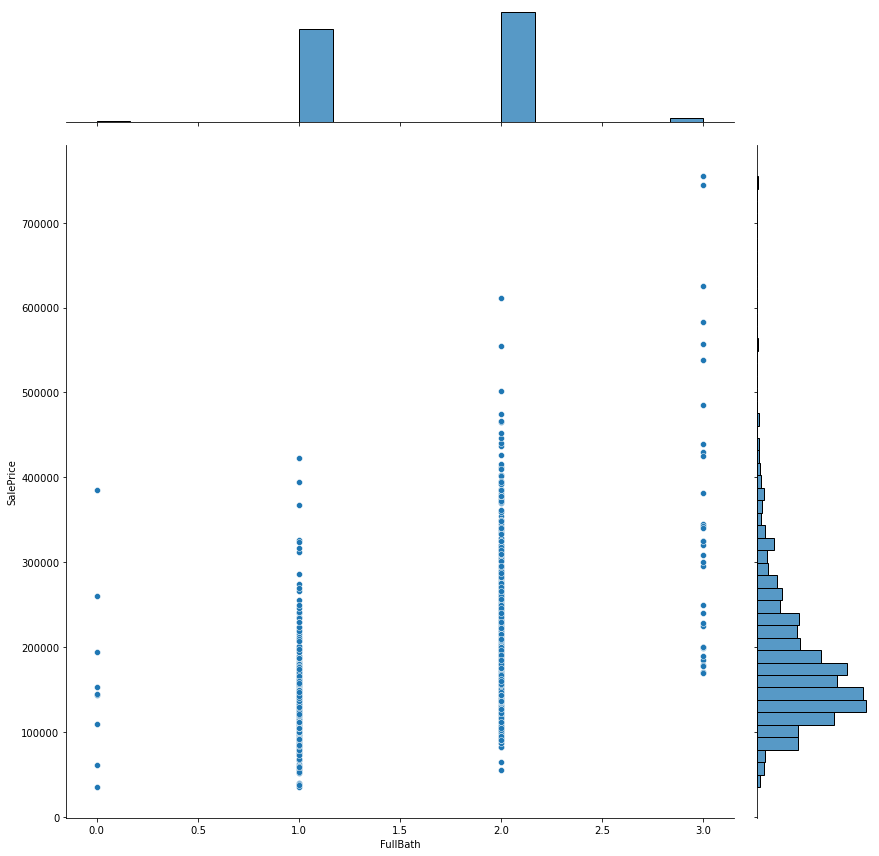

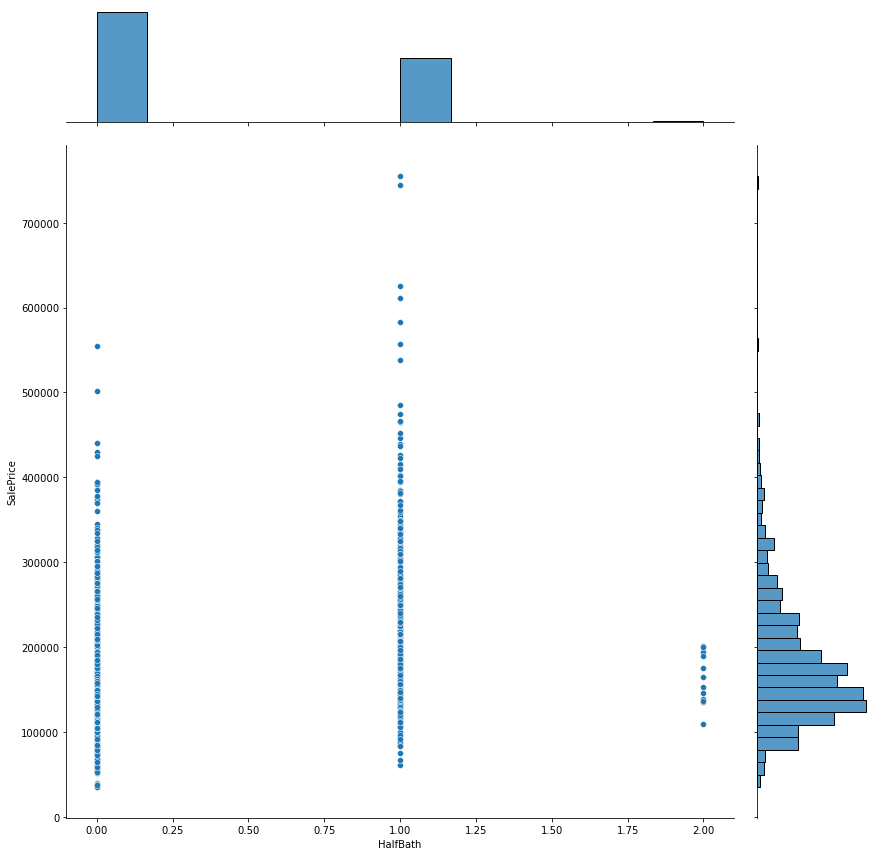

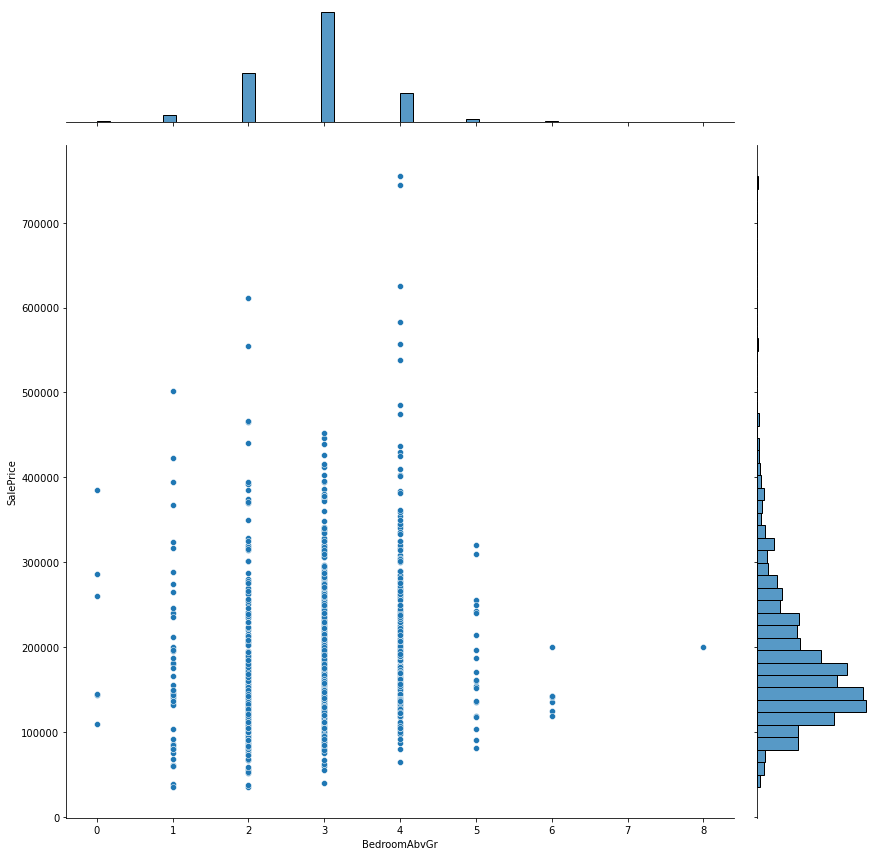

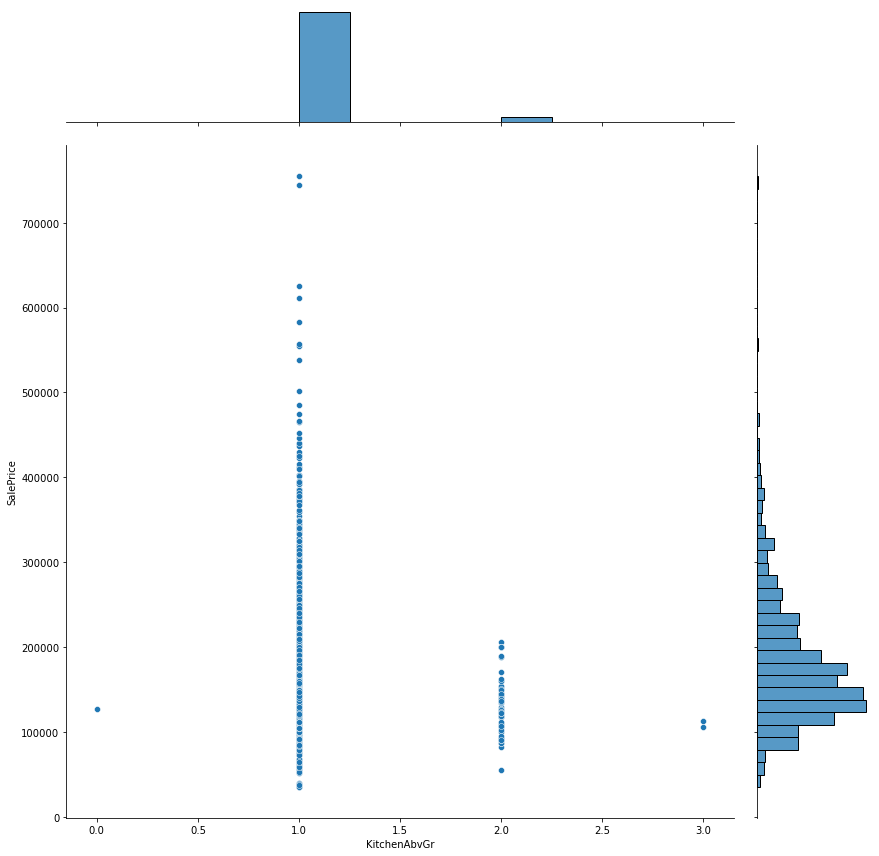

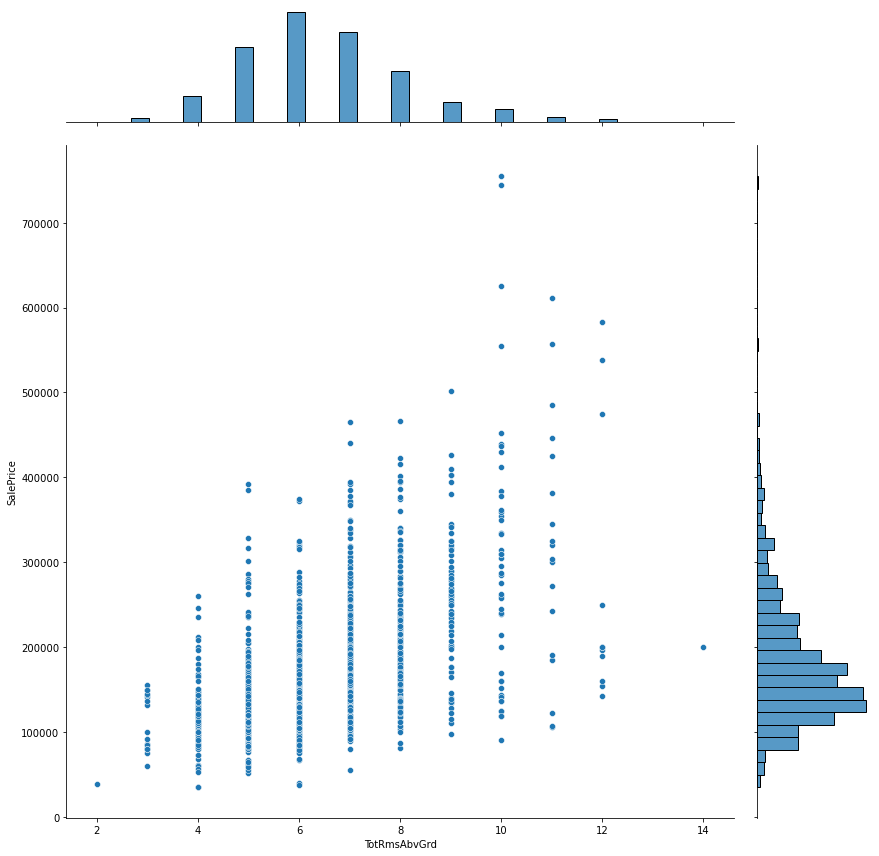

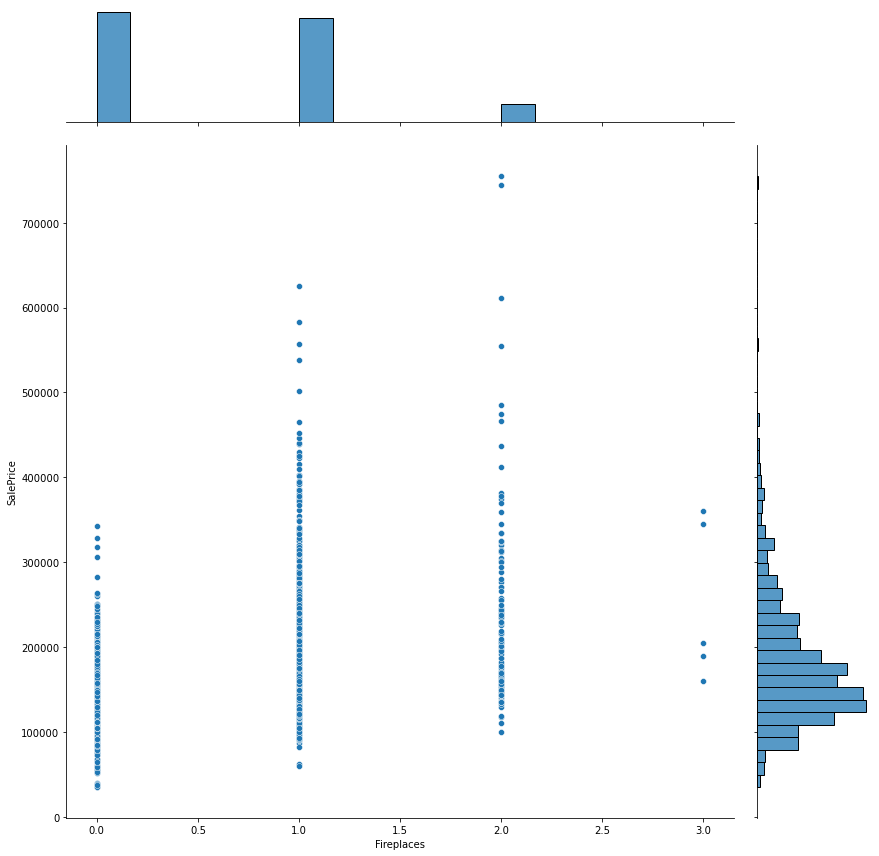

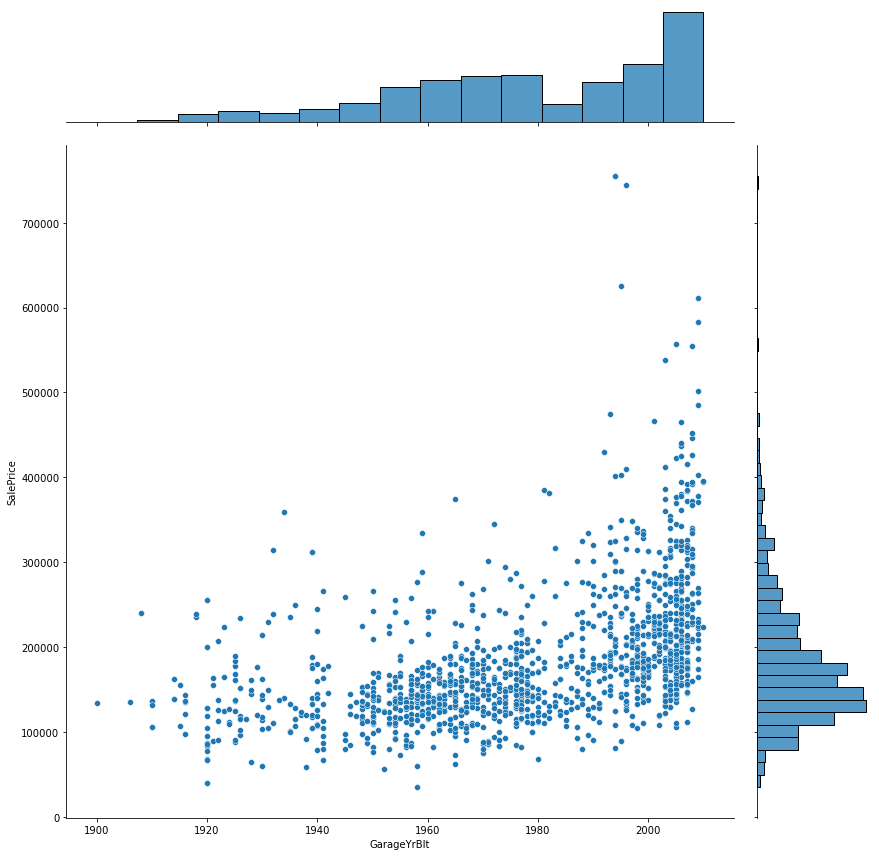

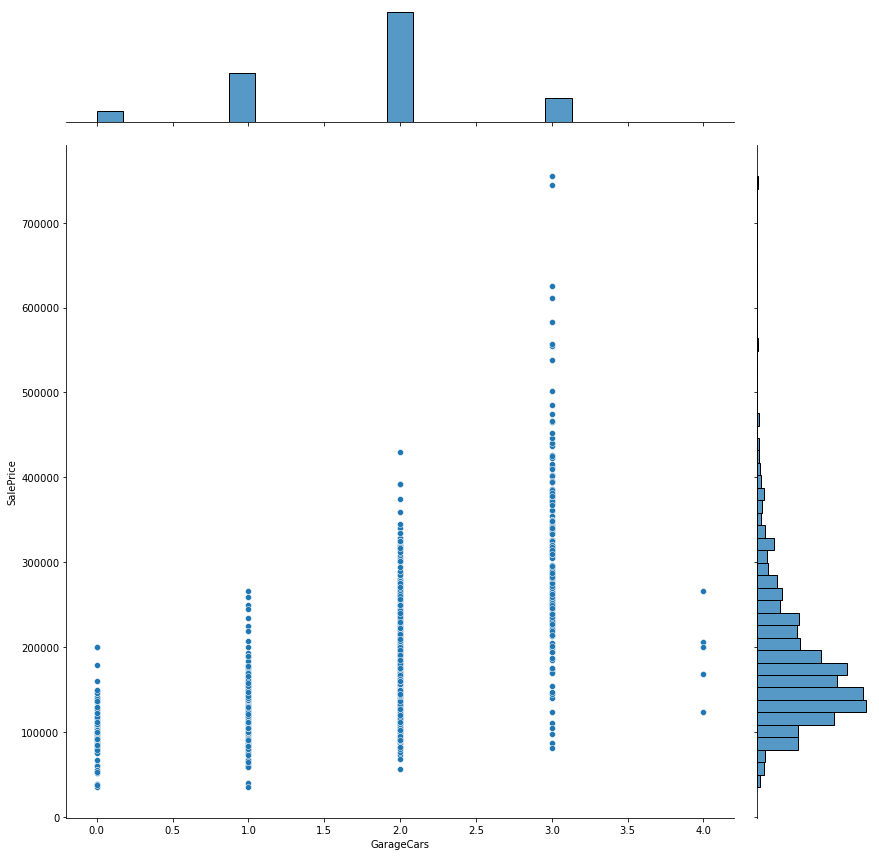

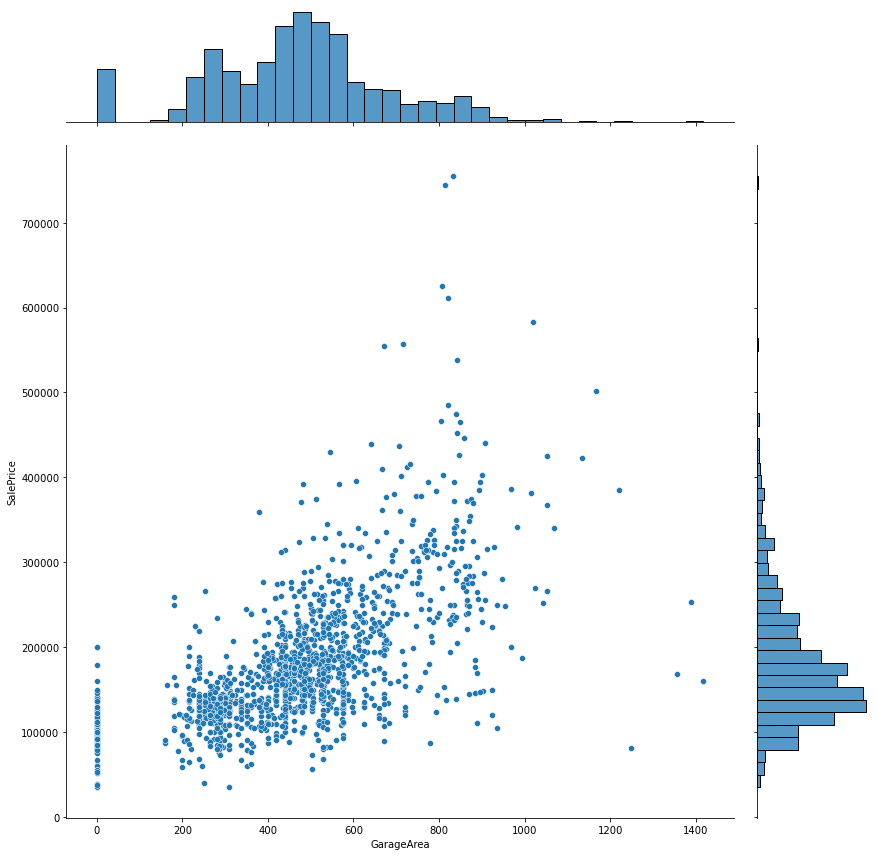

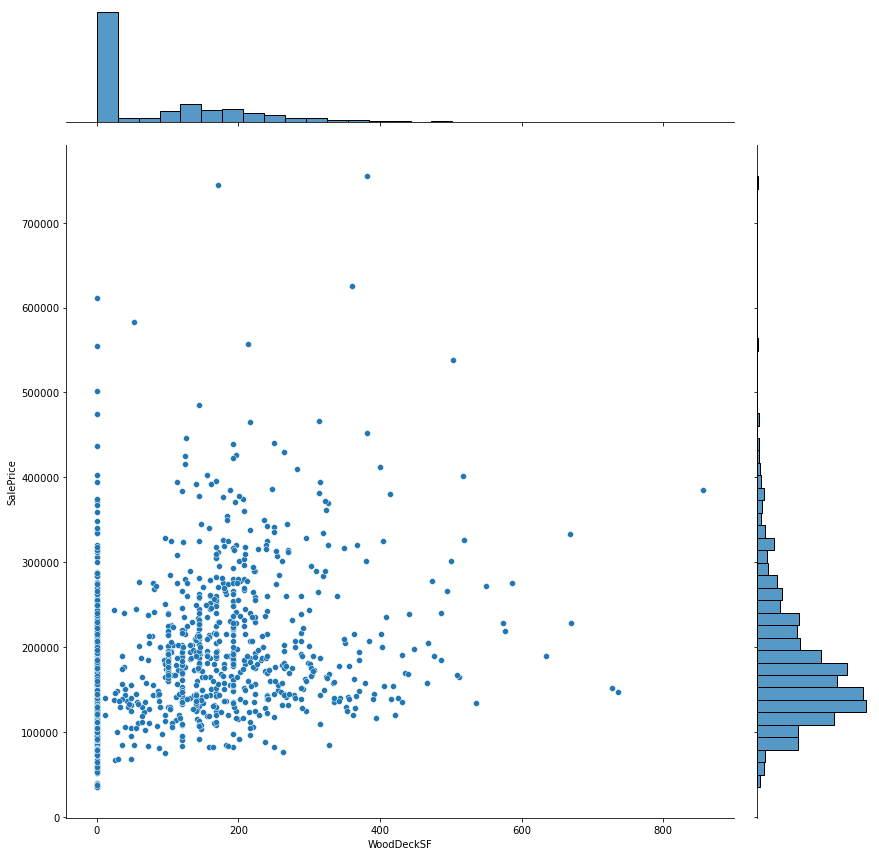

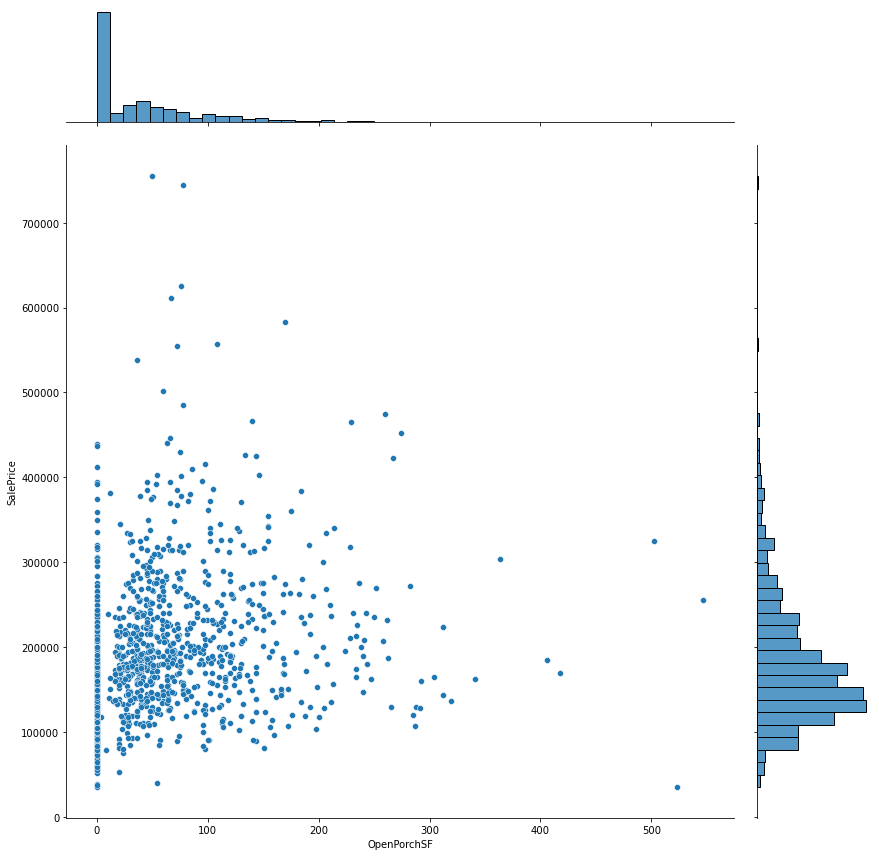

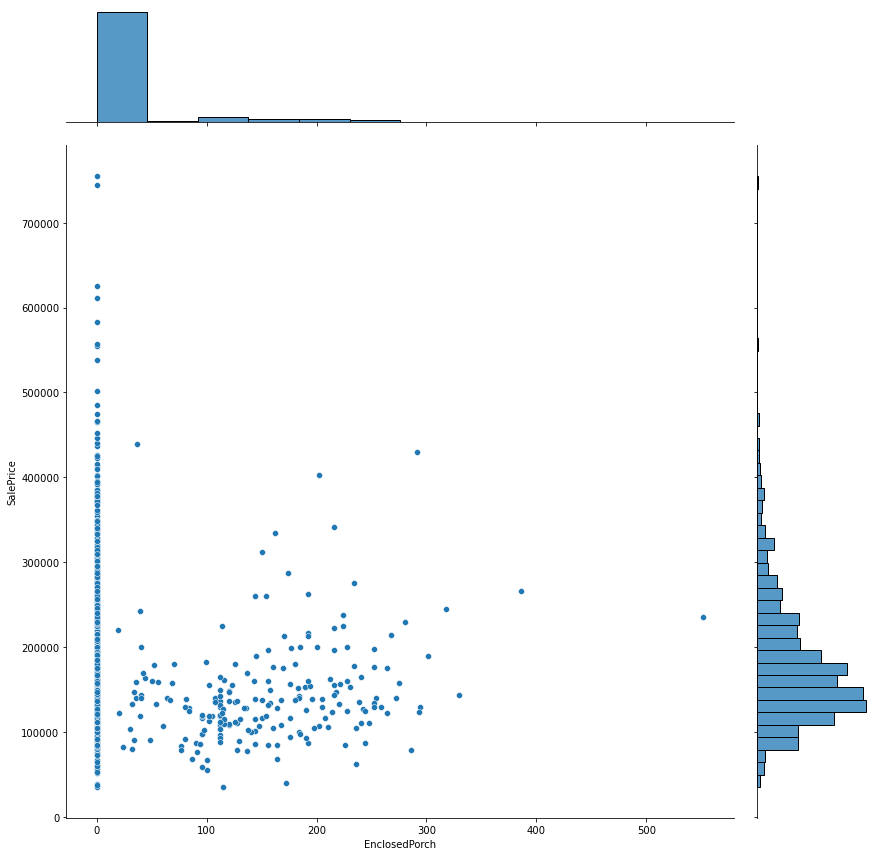

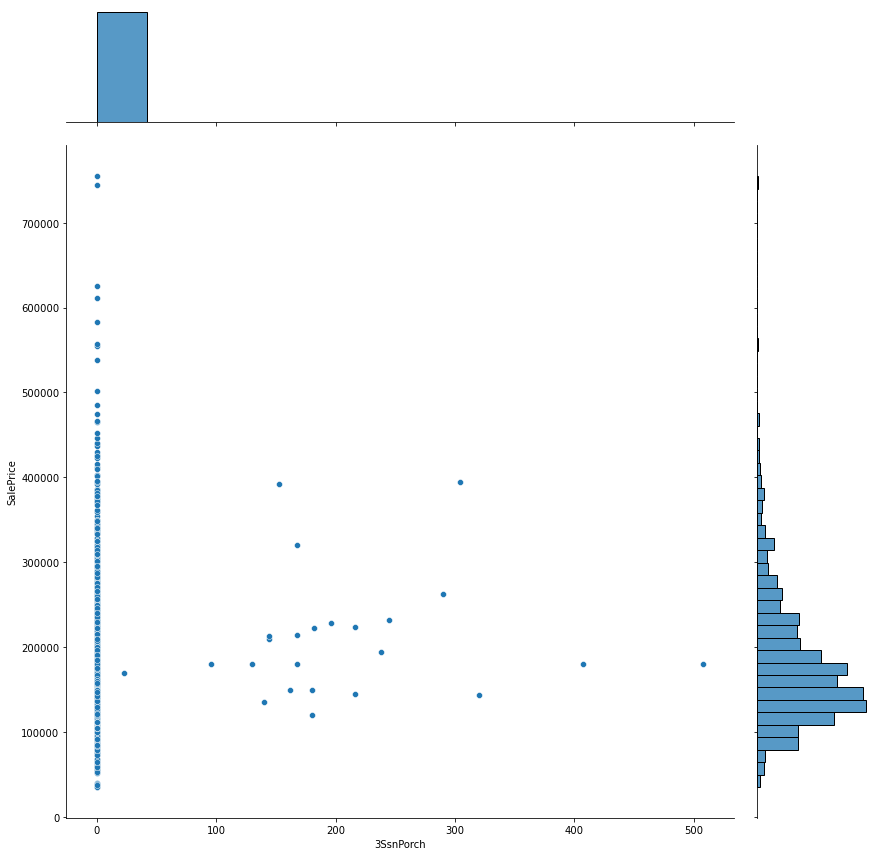

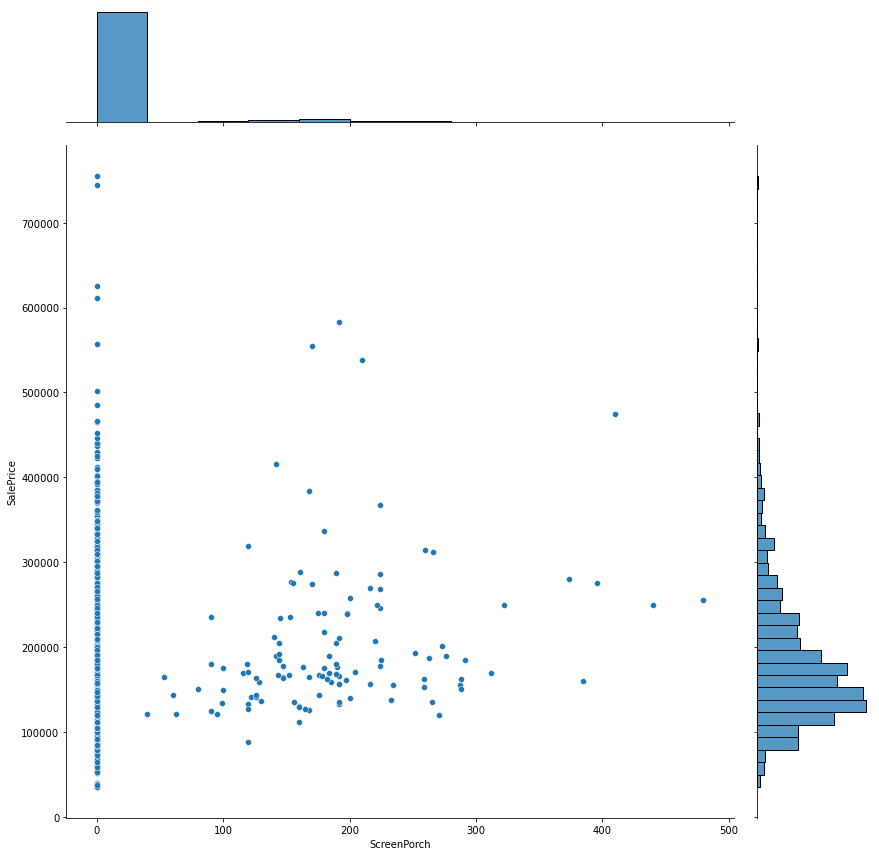

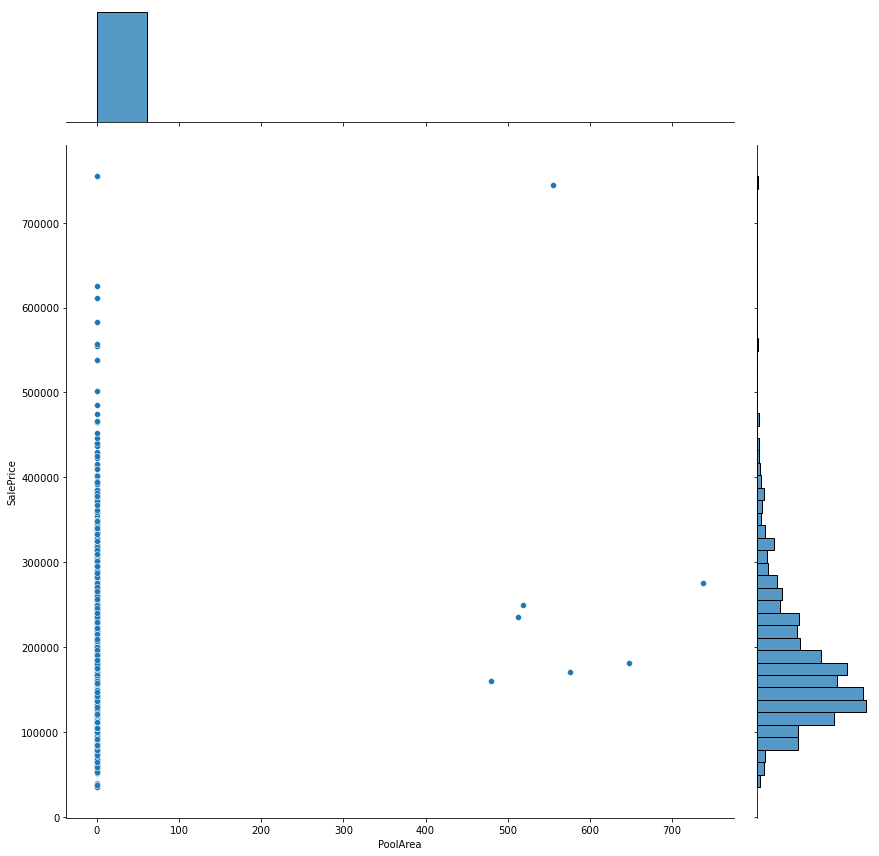

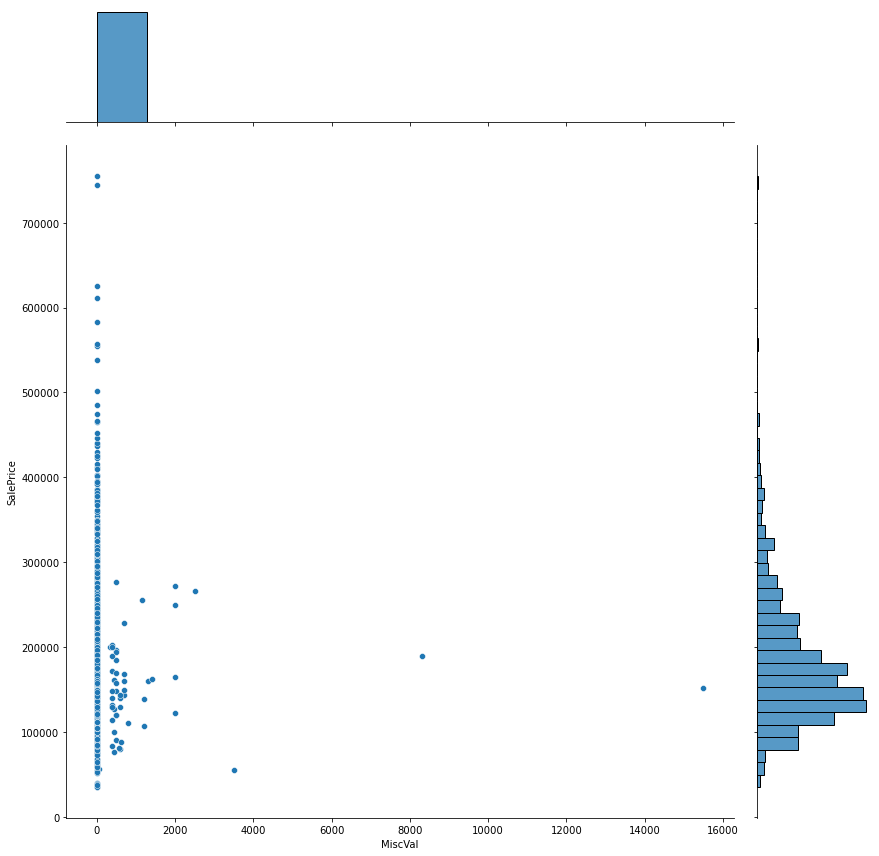

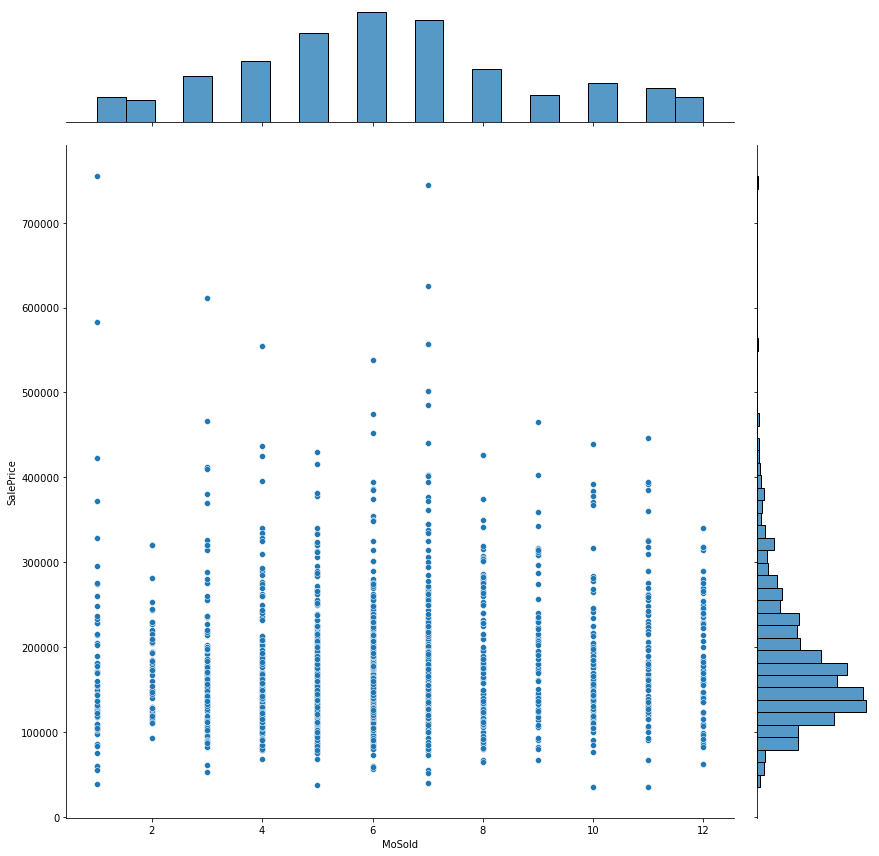

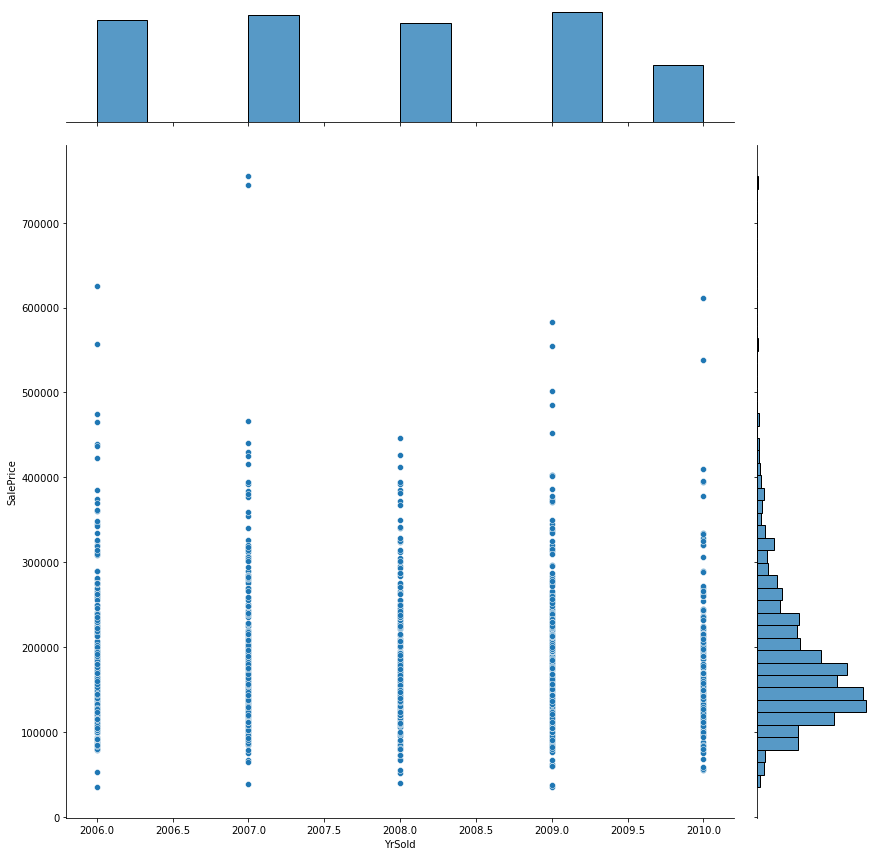

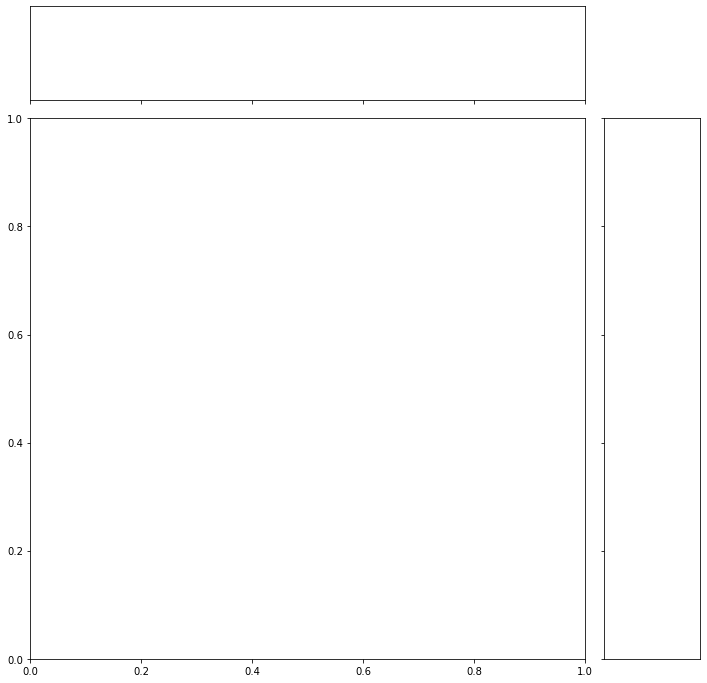

In [91]:
f, axes = plt.subplots(11, 3, figsize=(18, 24))

a = 0 
b = 0
for col in clean_data:
    if col == 'SalesPrice':
        break
    
    temp = pd.DataFrame(clean_data[col])
    JD = pd.concat([SP, temp], axis=1).reindex(SP.index)
    sb.jointplot(data = JD, x = col, y = "SalePrice", height = 12, ax = axes[a,b])   #jointplot dosen seem to support ax argument
    
    if b==2:
        a+=1
        b=0
    

C:\Users\Agnes Tan\anaconda3\lib\site-packages\seaborn\axisgrid.py:1670: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


ValueError: If using all scalar values, you must pass an index

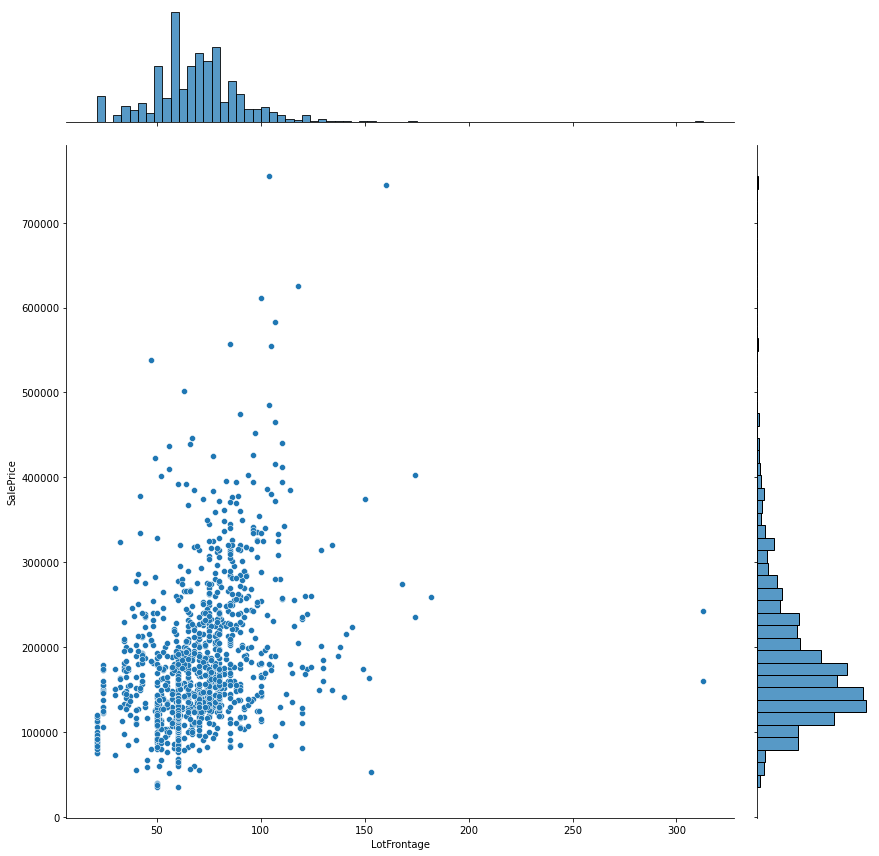

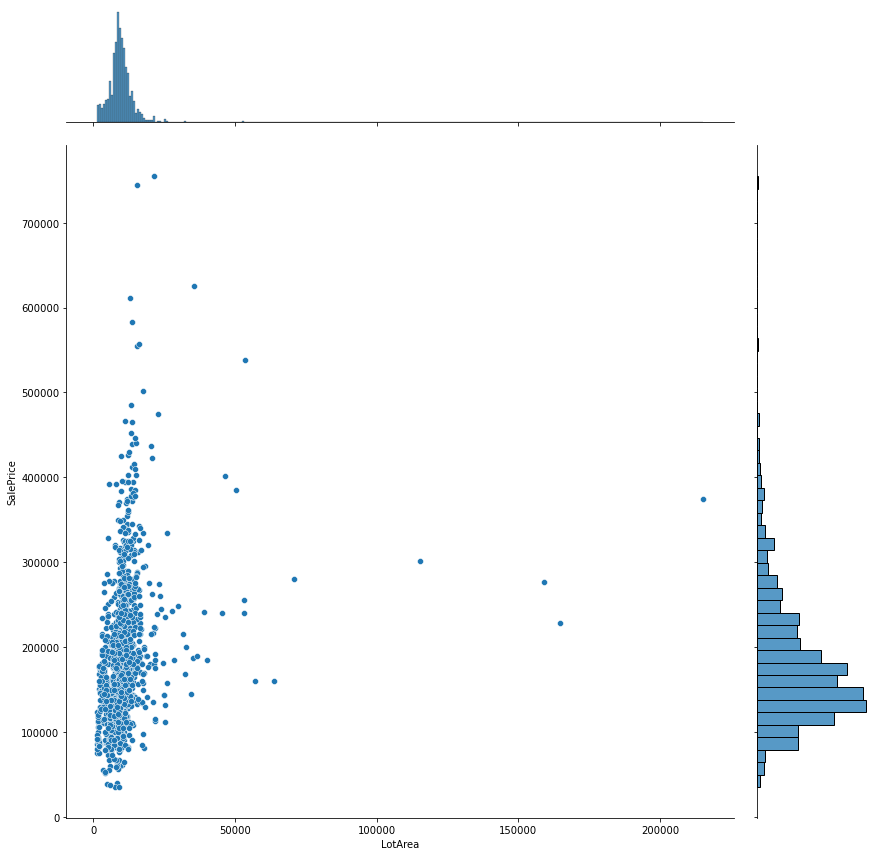

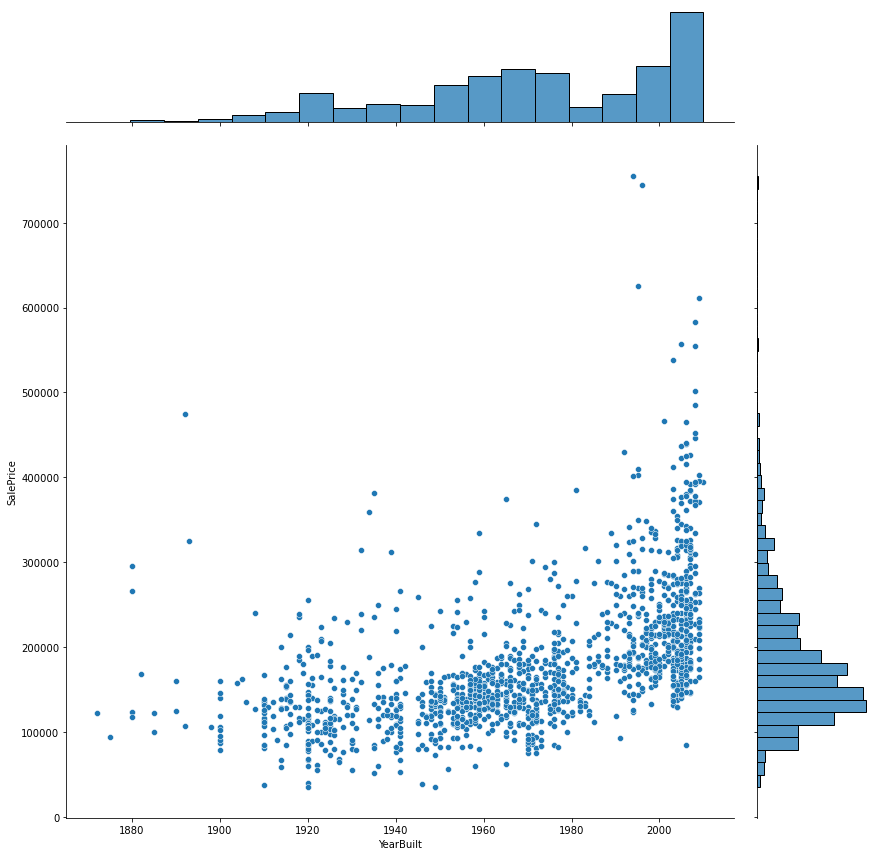

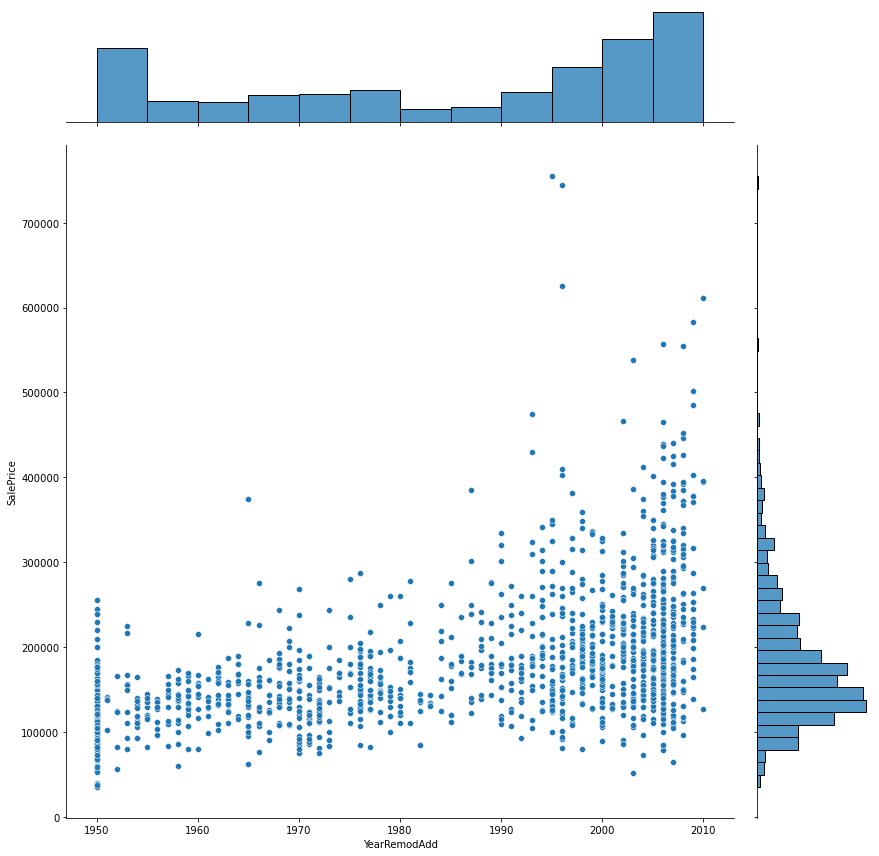

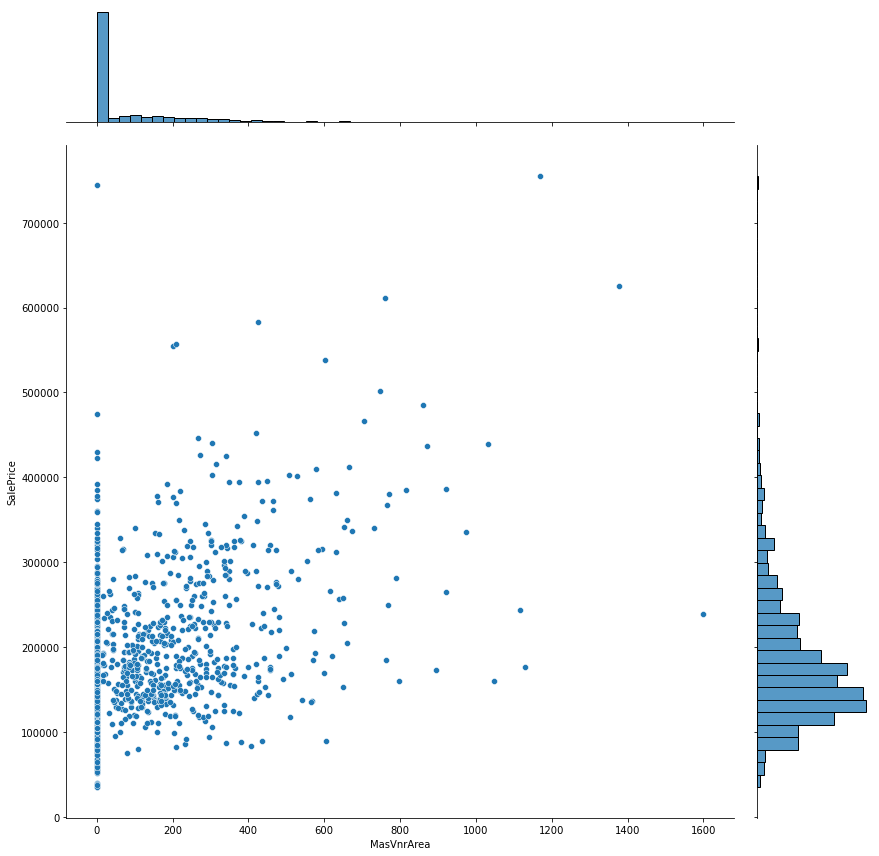

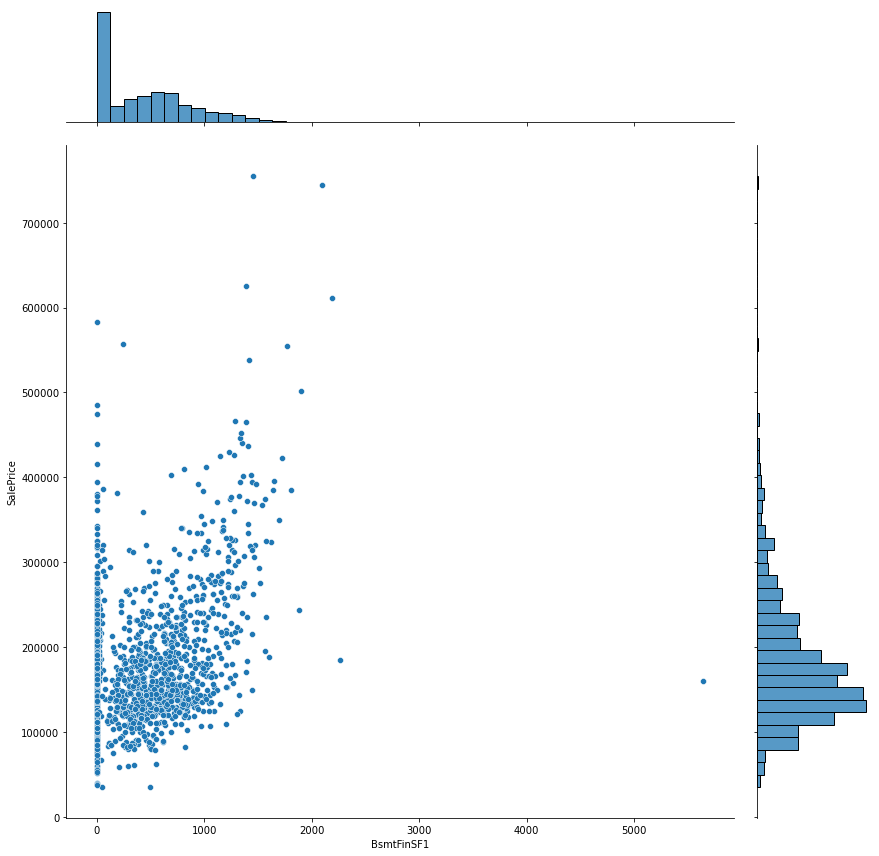

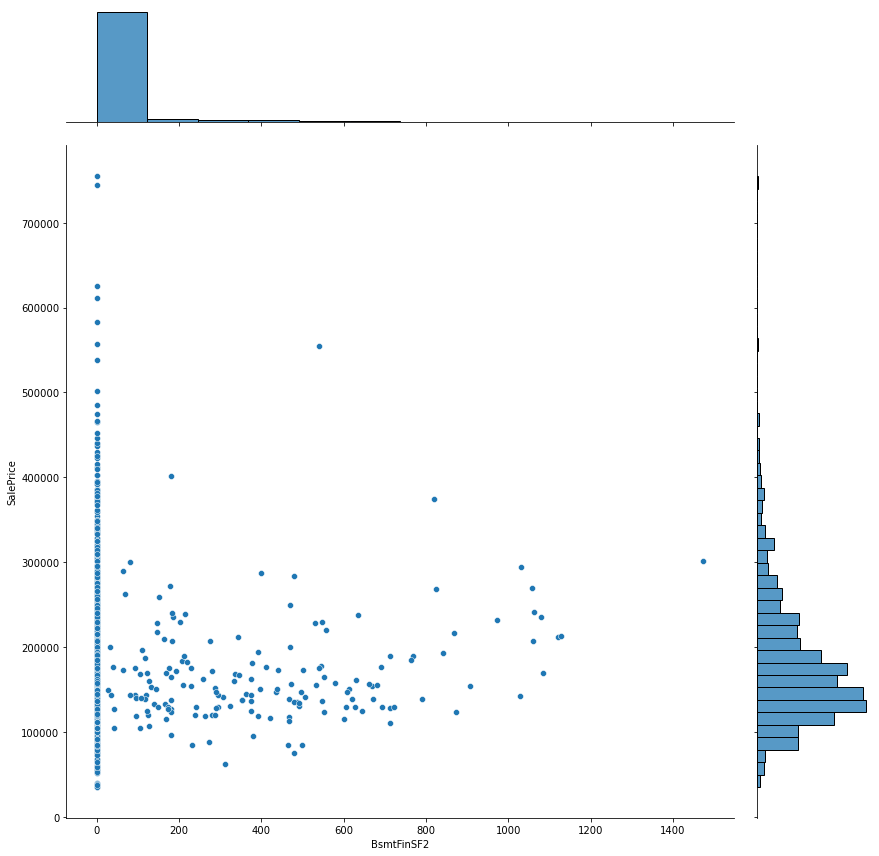

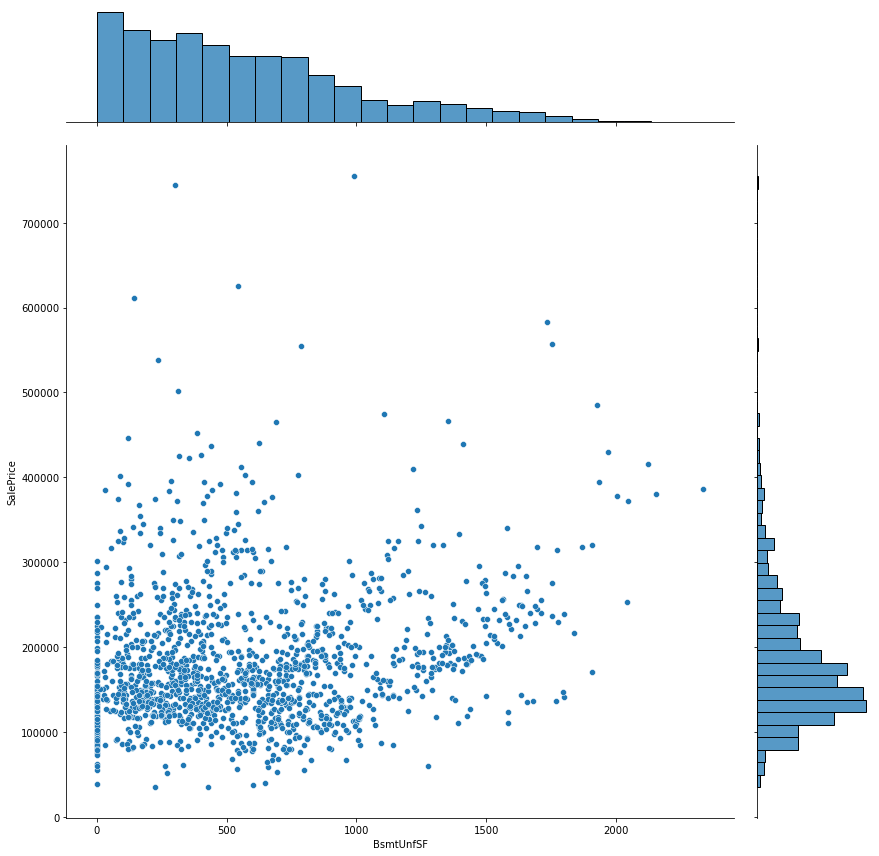

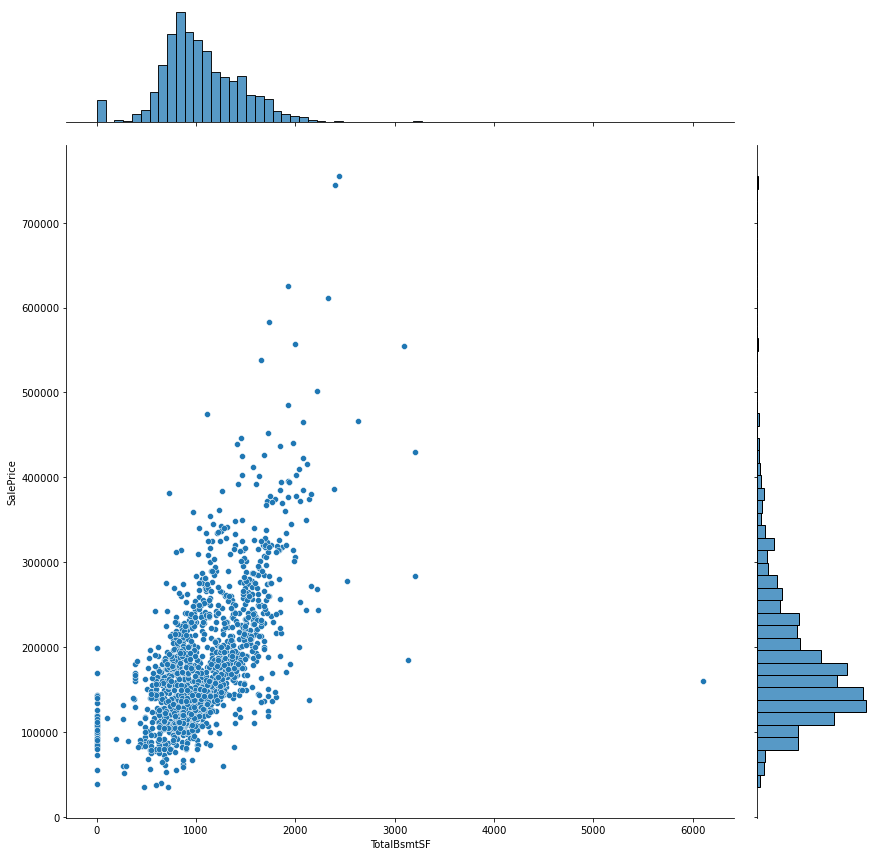

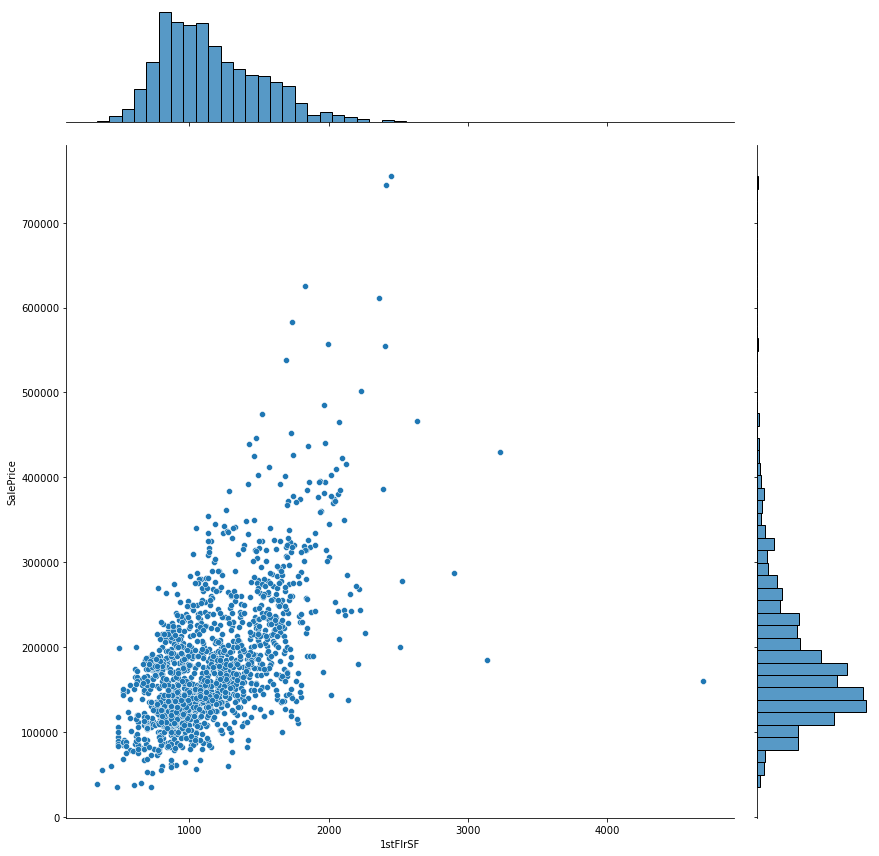

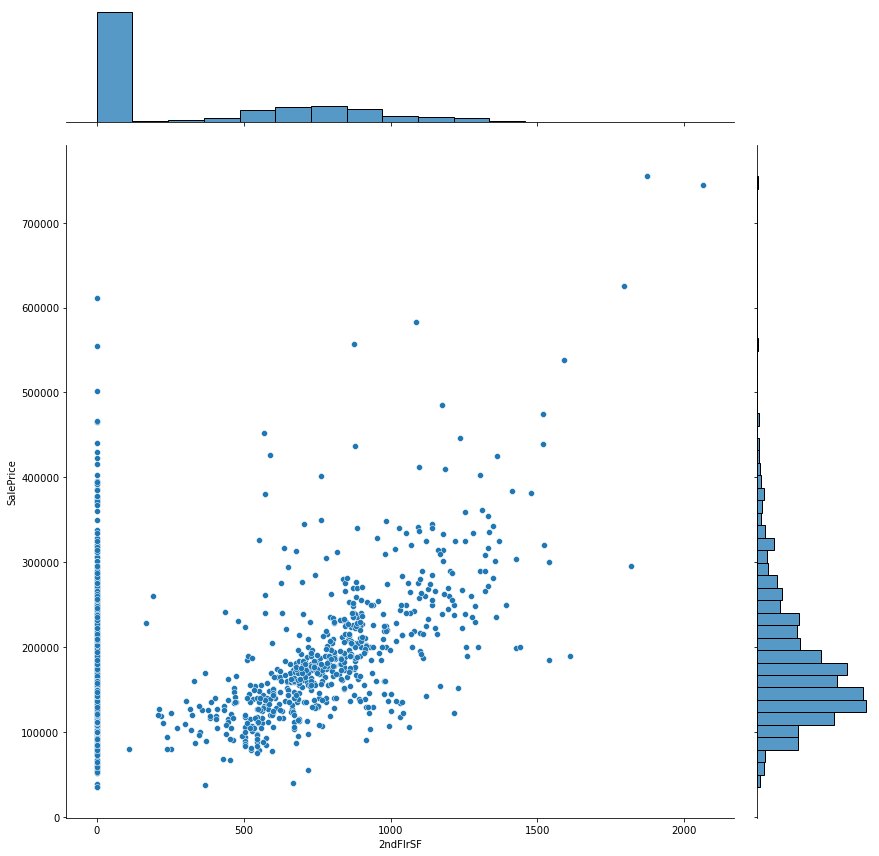

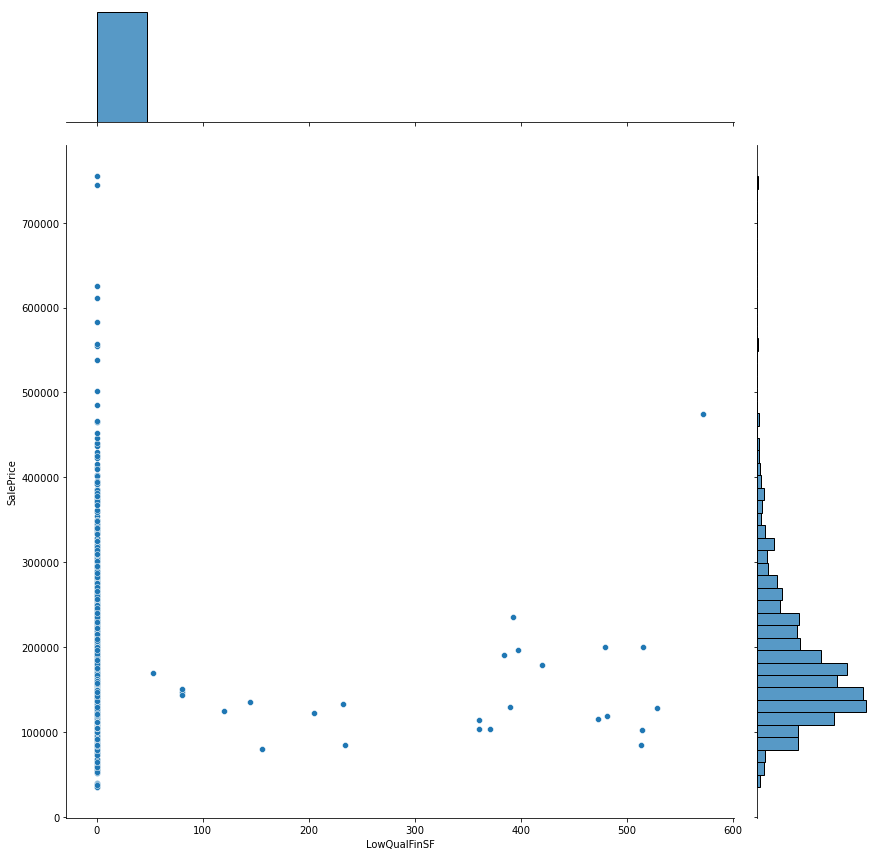

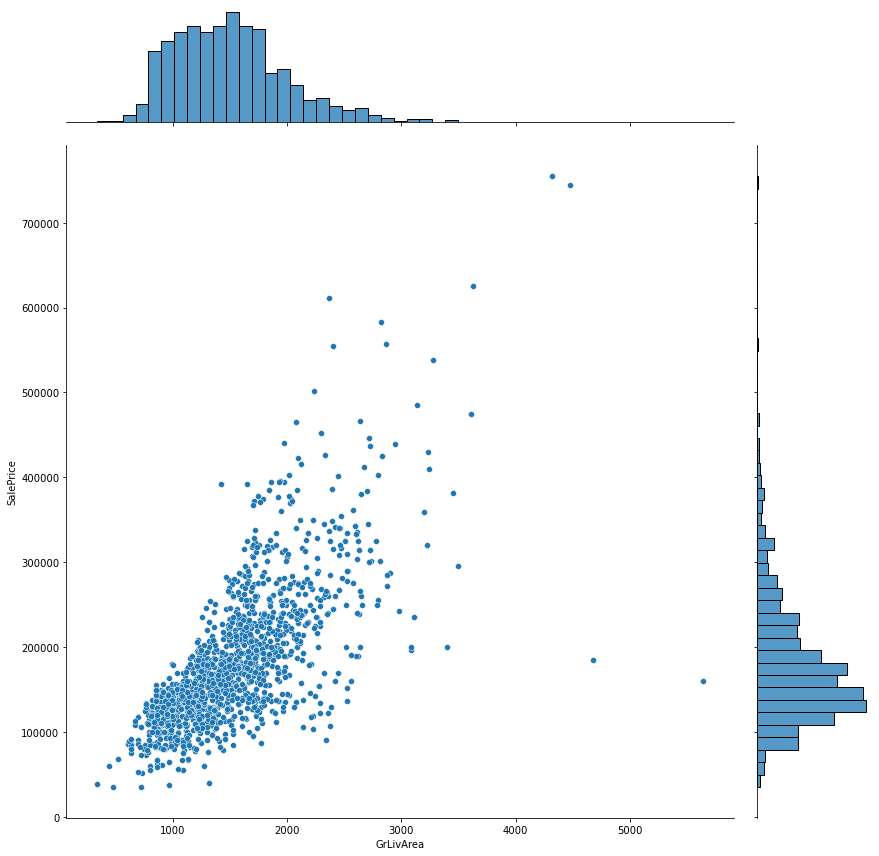

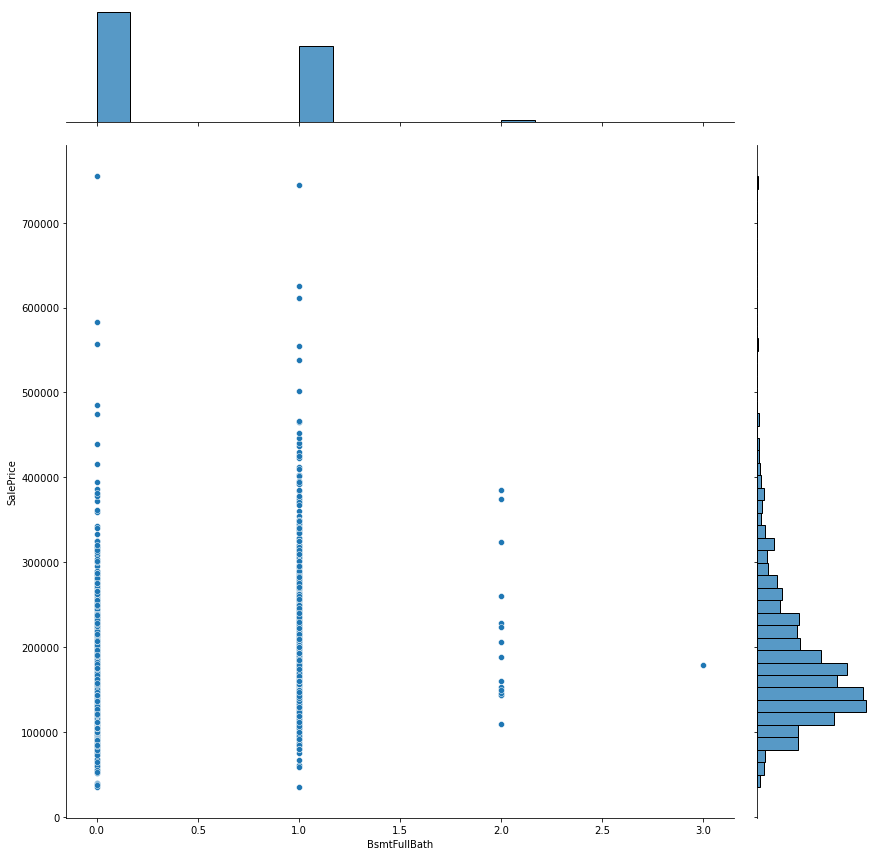

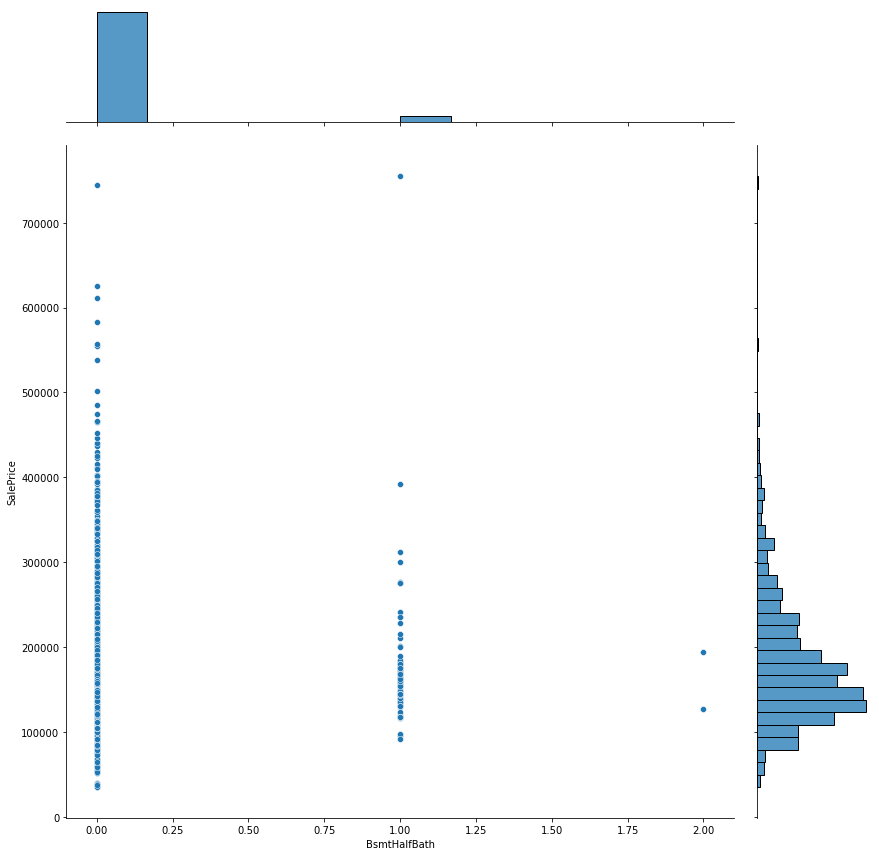

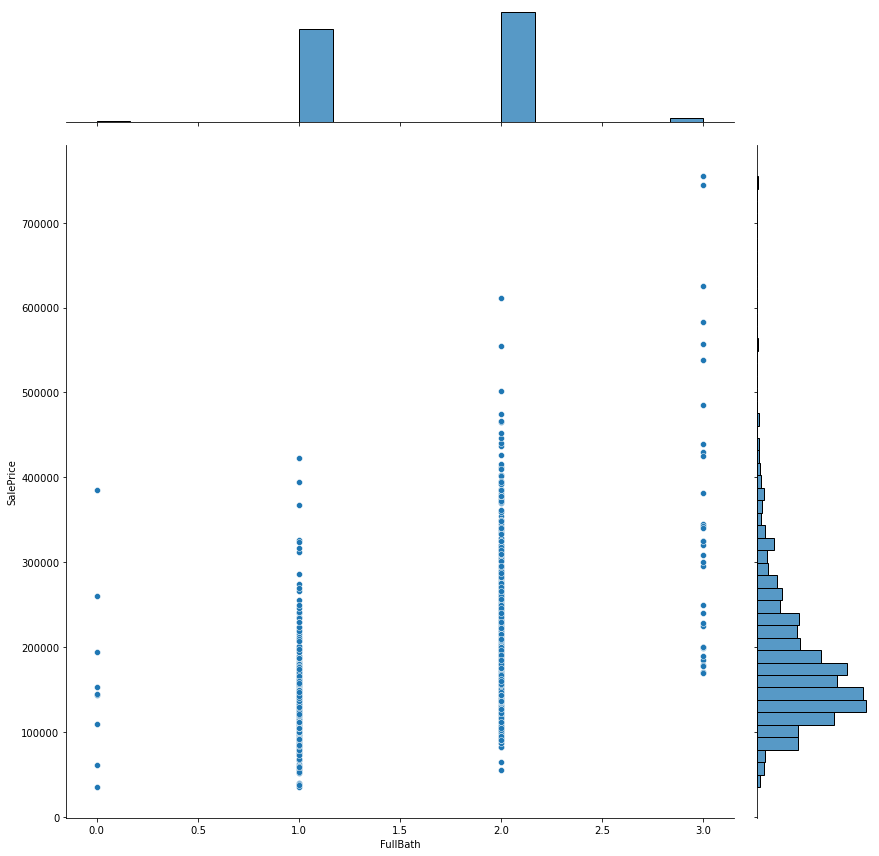

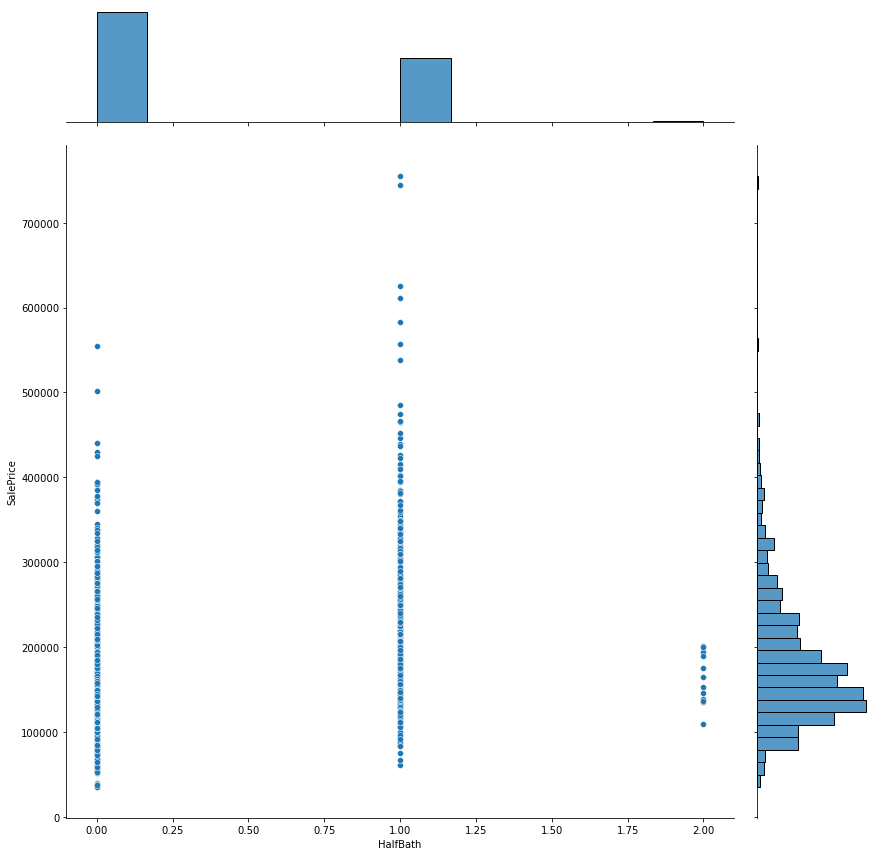

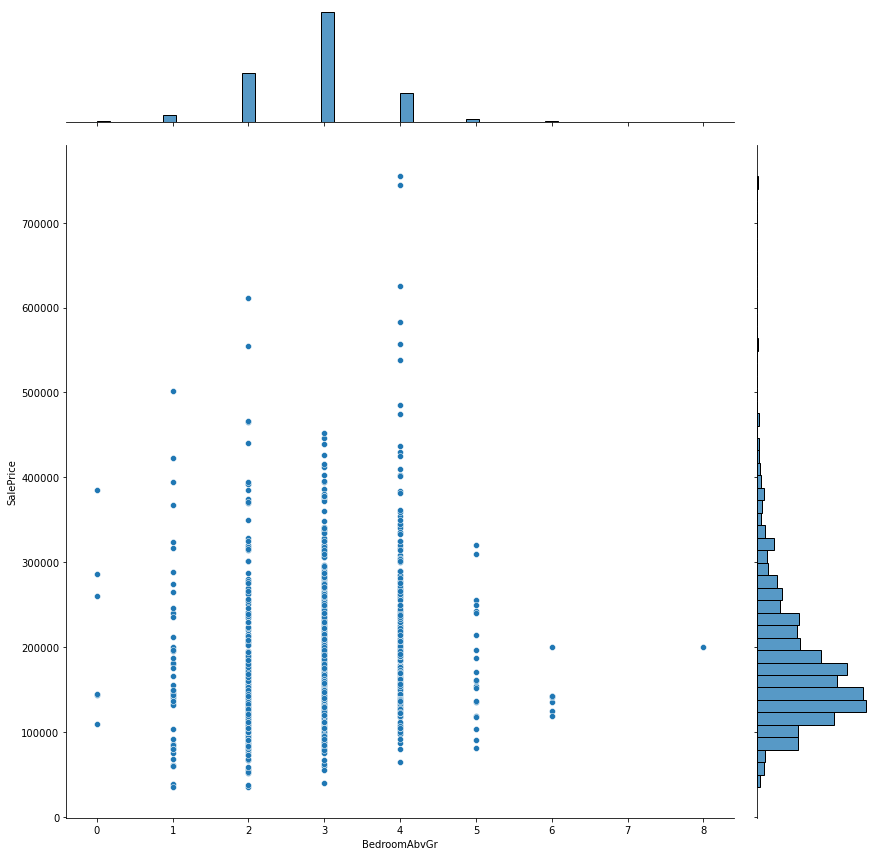

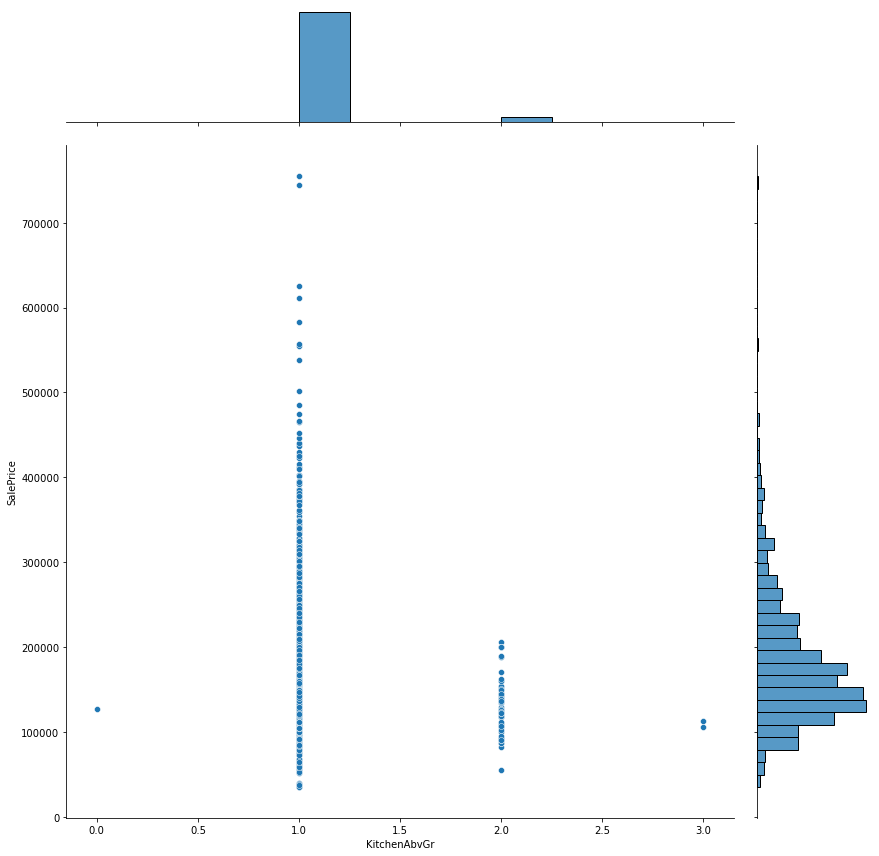

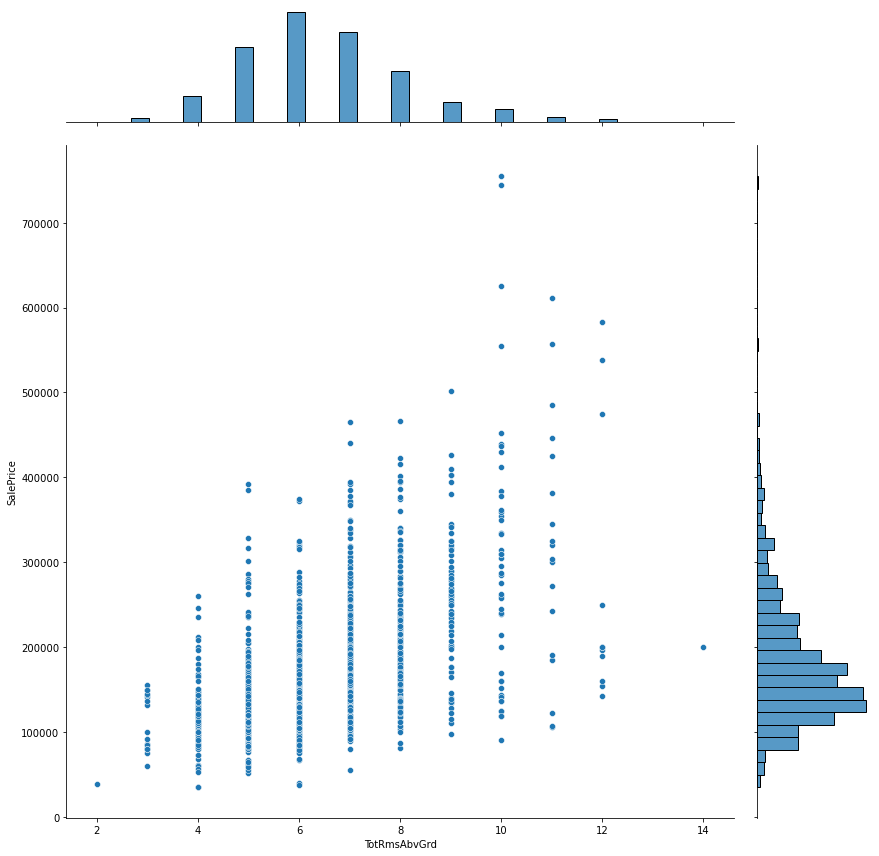

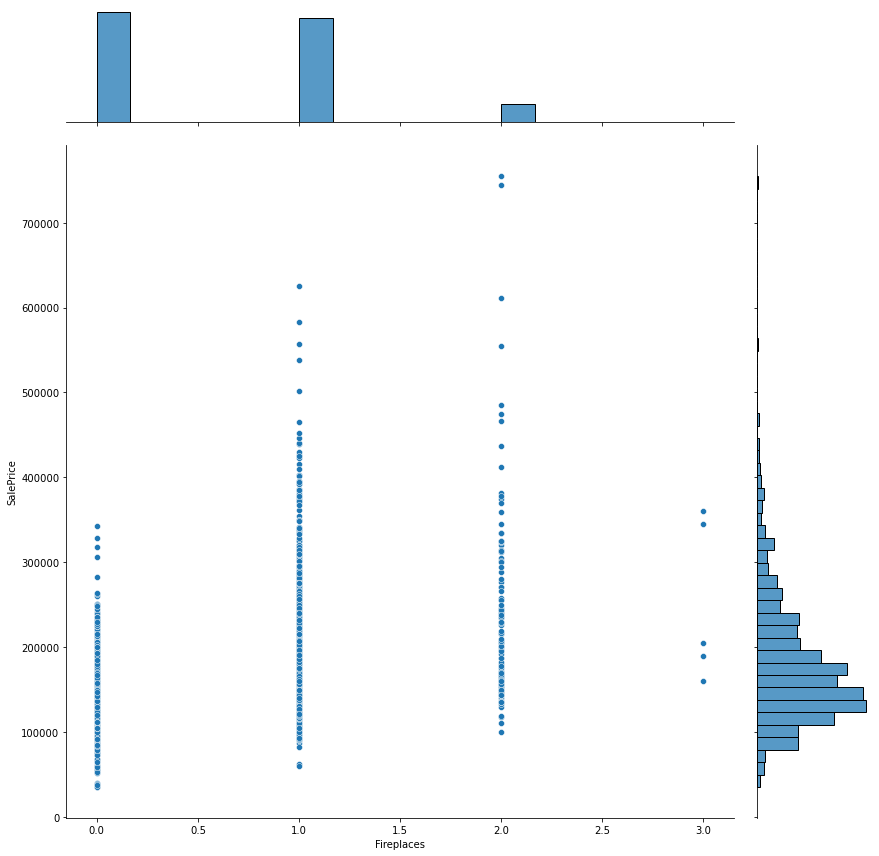

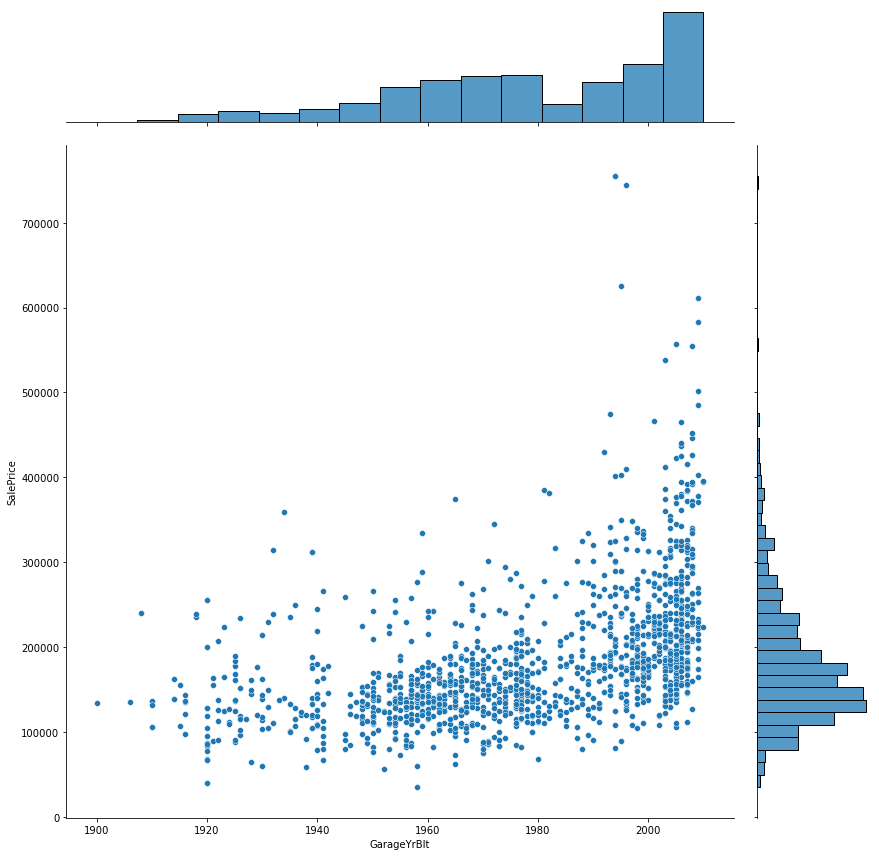

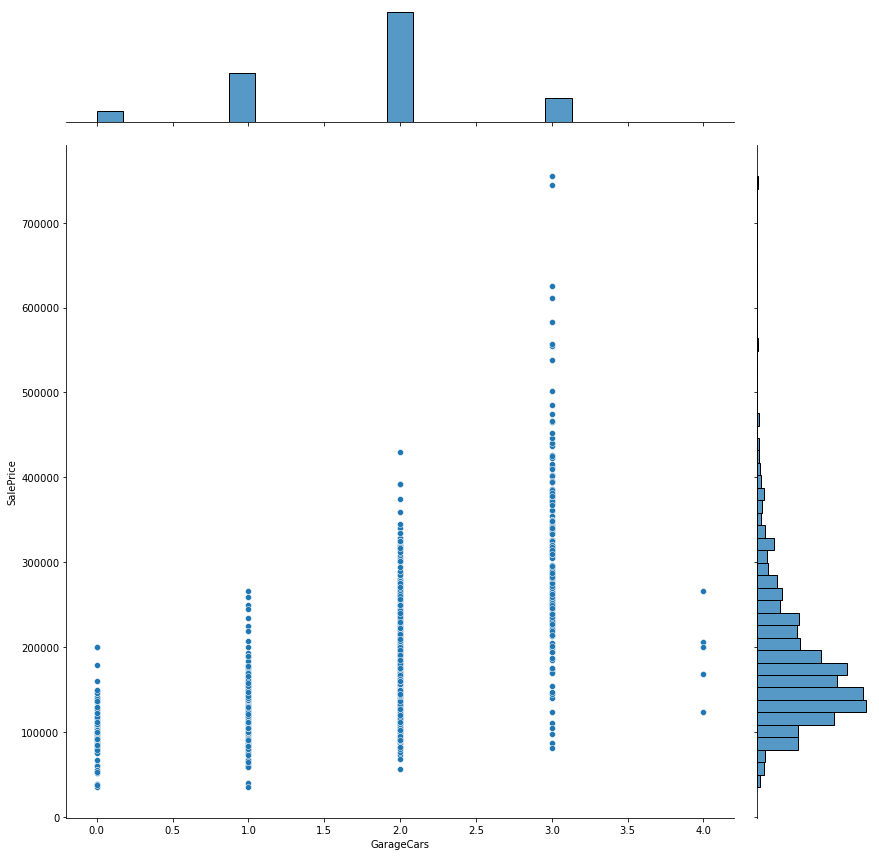

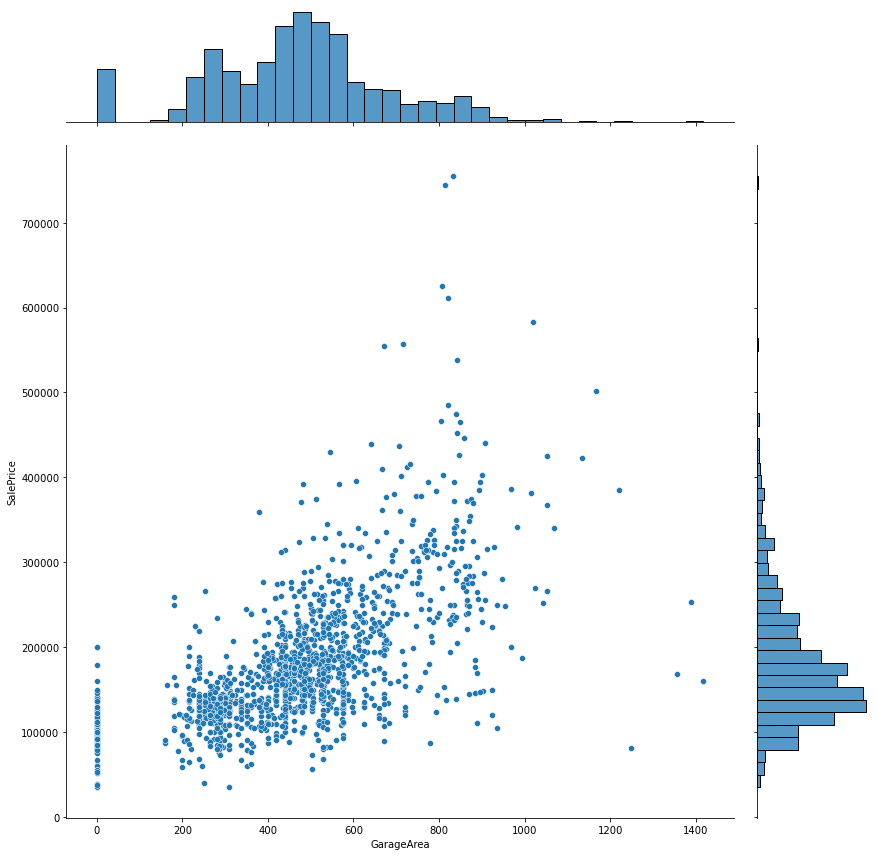

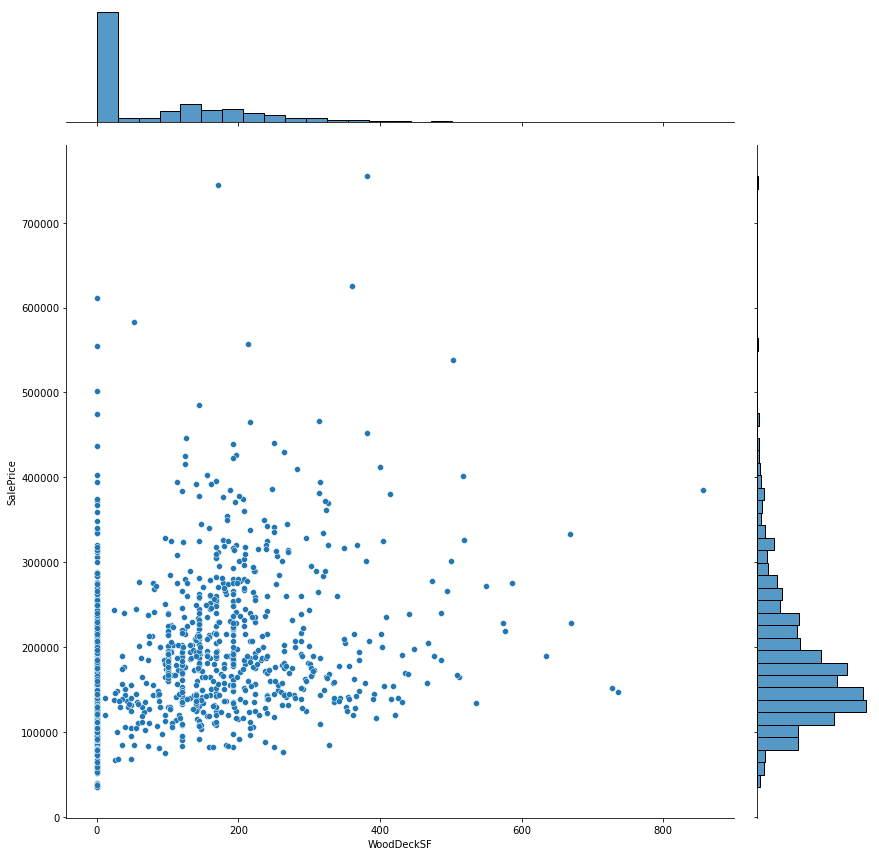

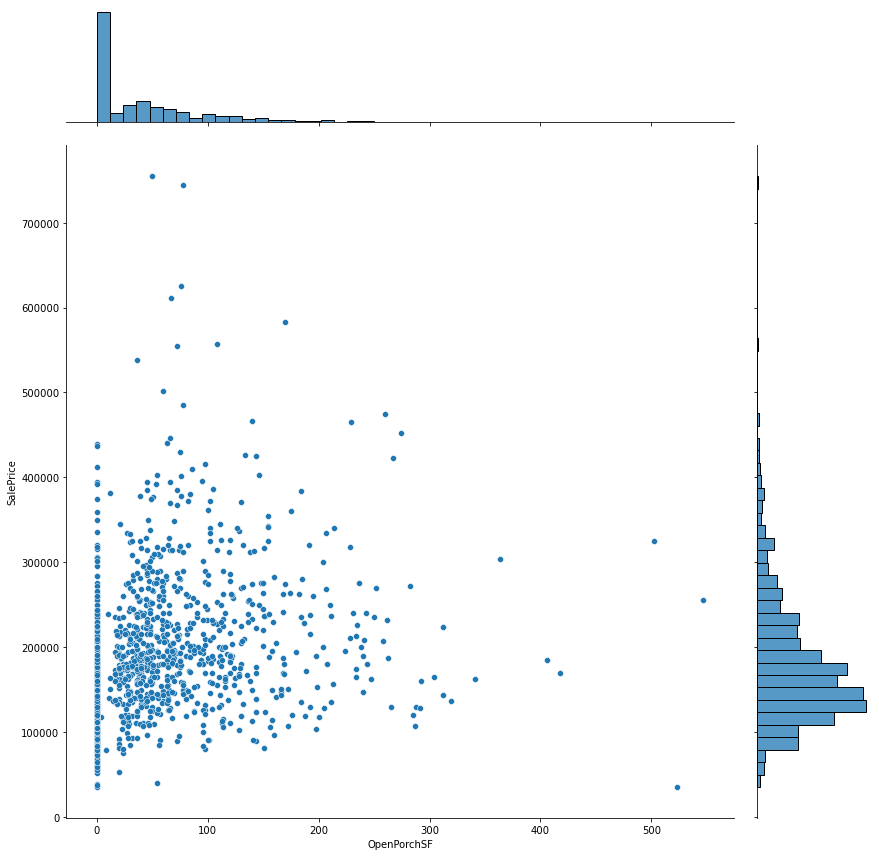

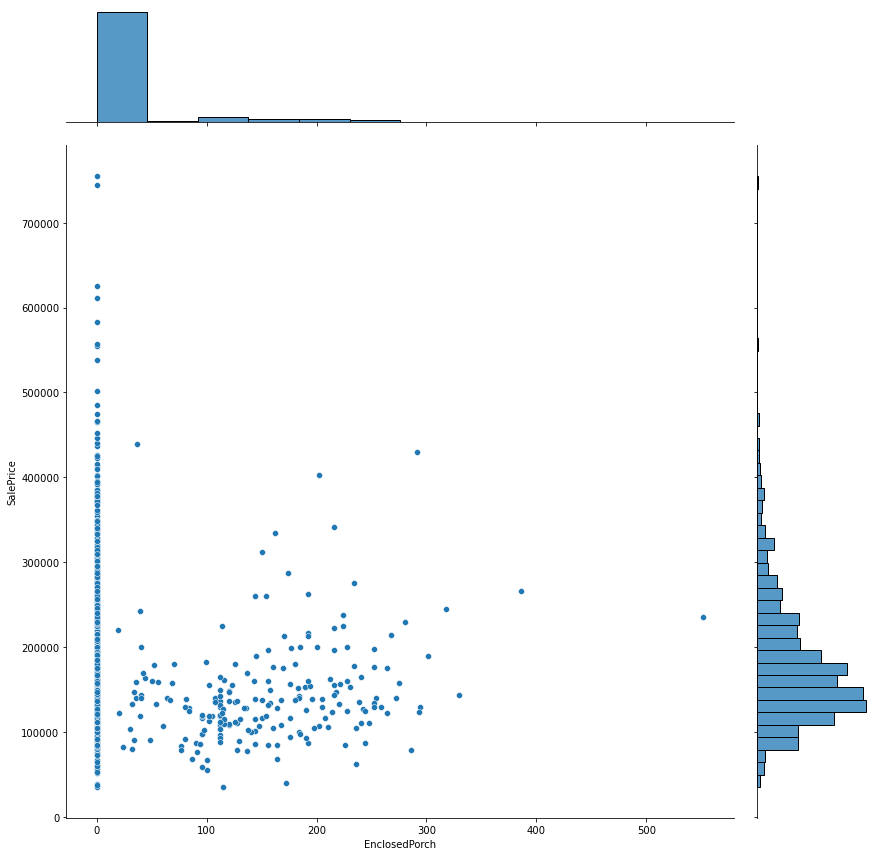

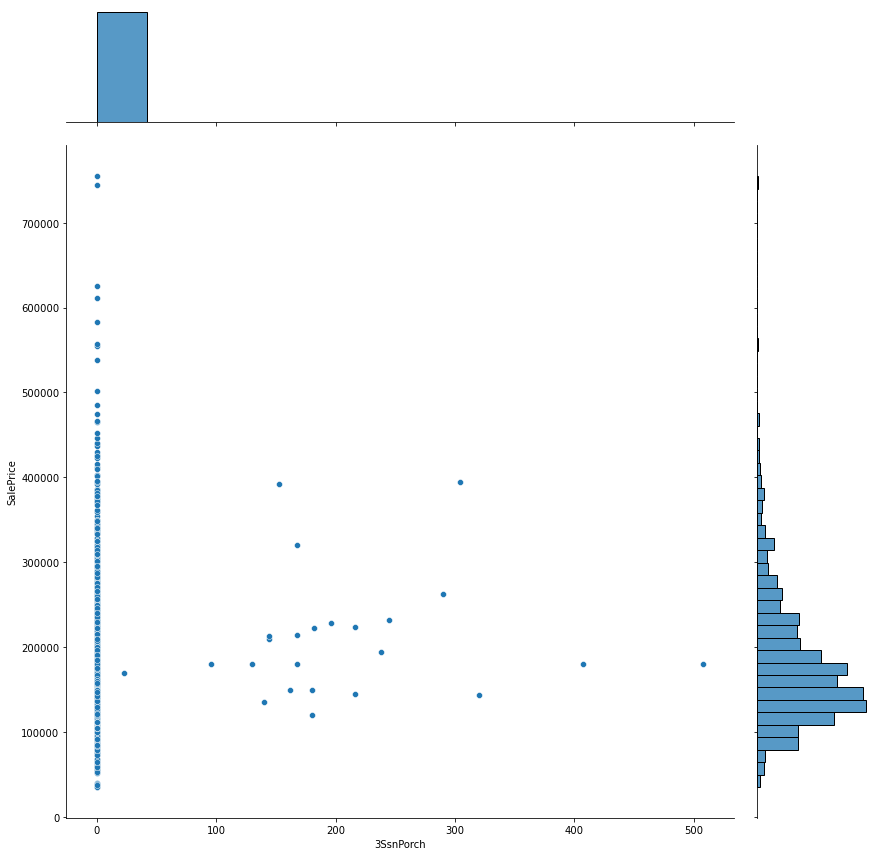

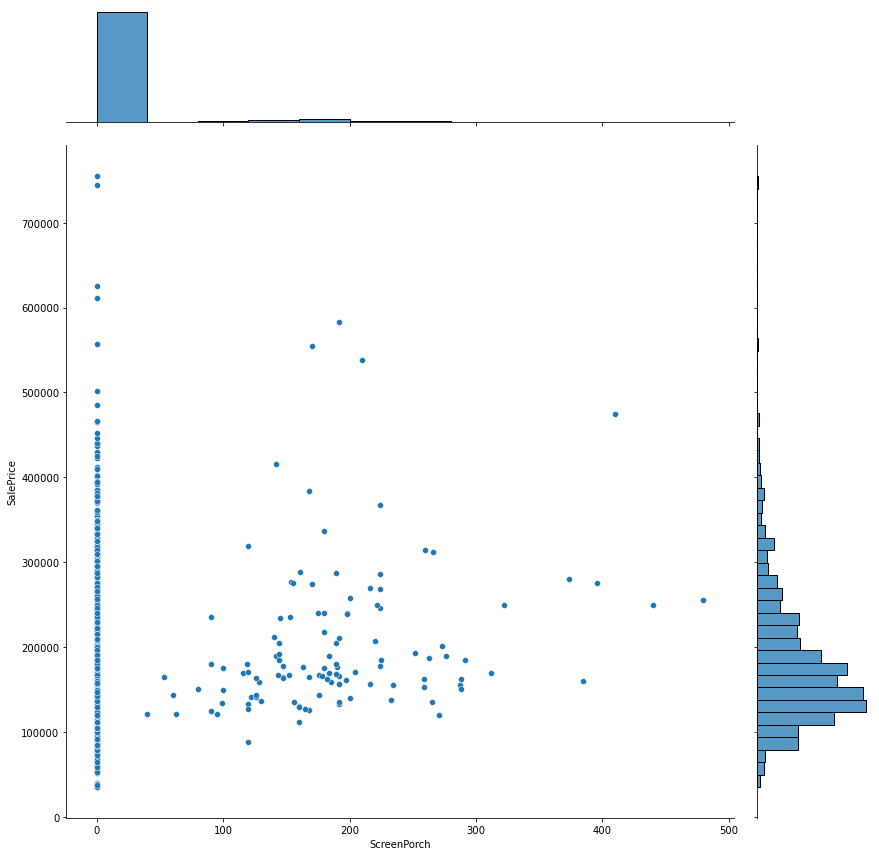

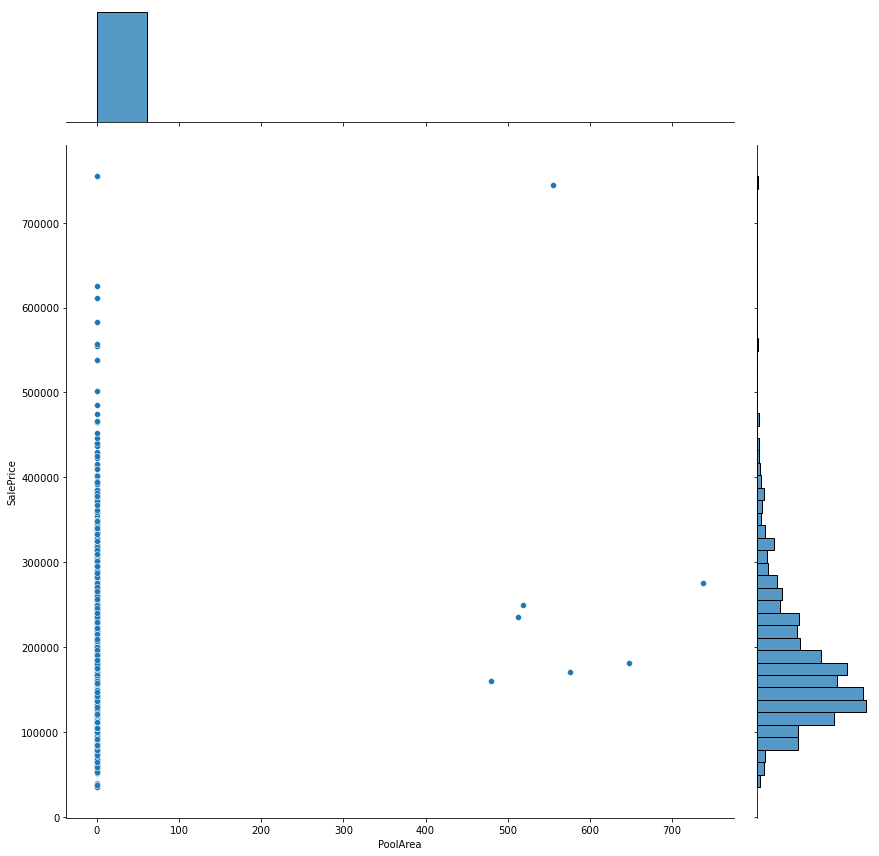

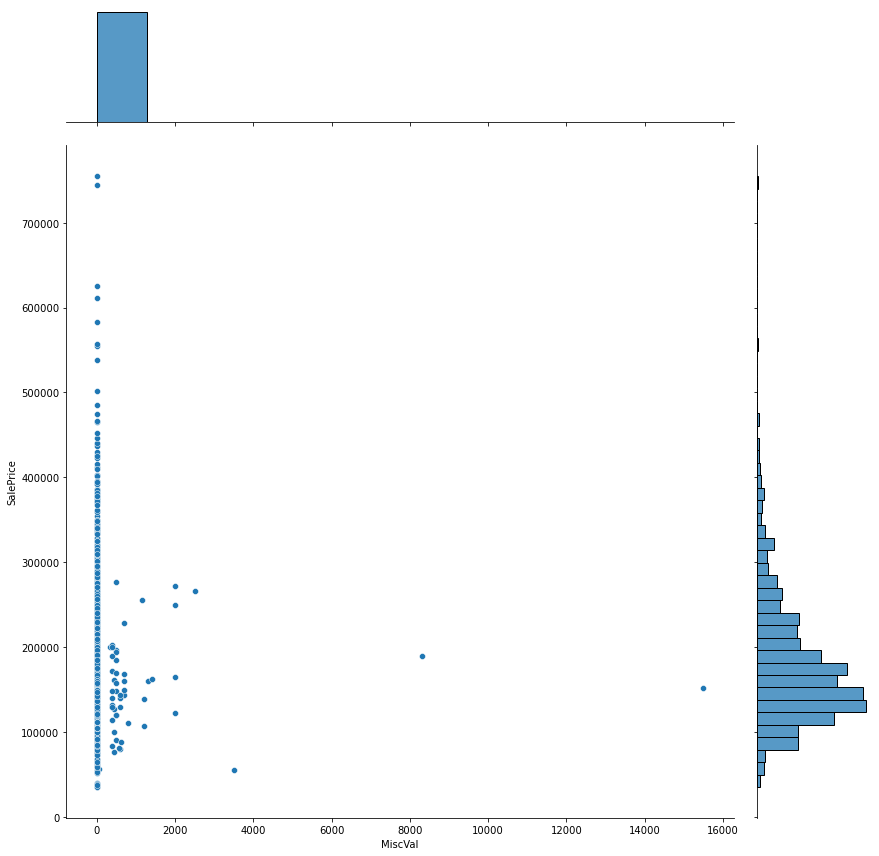

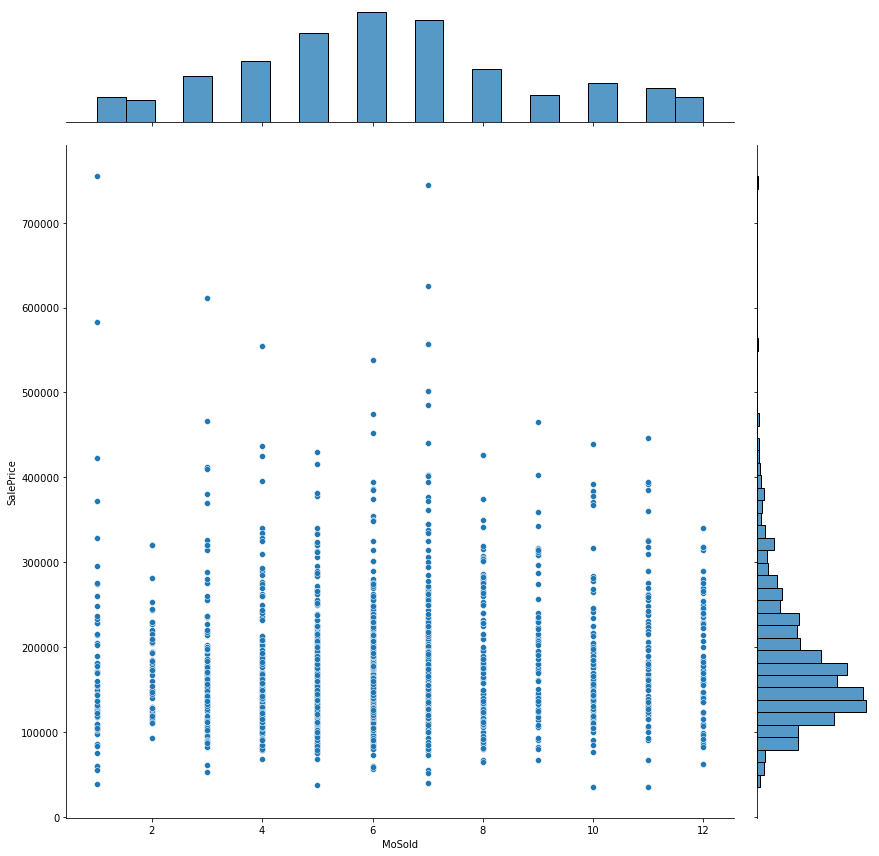

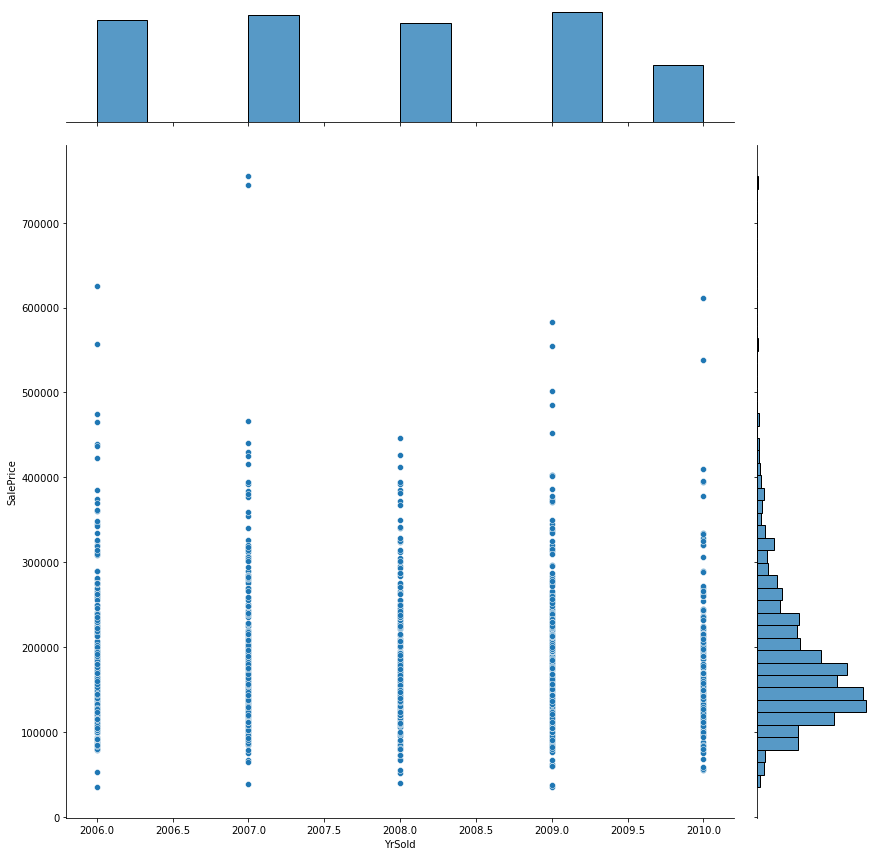

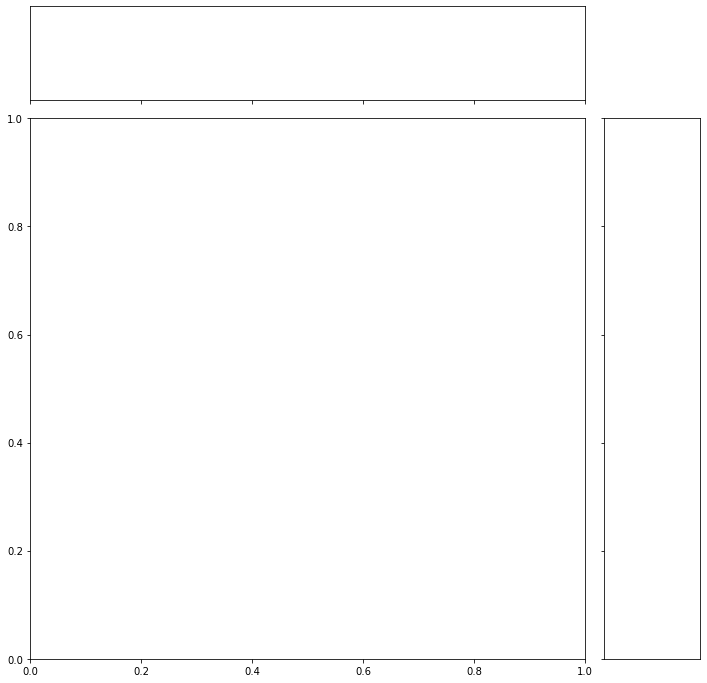

In [92]:
for col in clean_data:
    if col == 'SalePrice':
        break
    
    temp = pd.DataFrame(clean_data[col])
    JD = pd.concat([SP, temp], axis=1).reindex(SP.index)
    sb.jointplot(data = JD, x = col, y = "SalePrice", height = 12)

    